## Сначала приведем все в понятный для пандаса вид, импортируем все нужное

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [8]:
# стили
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme(context='talk', style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# для графиков, где надо много цветов
# sns.set_palette(sns.color_palette('deep'))
# а по дефолту 
sns.set_palette(sns.color_palette("Blues", n_colors=5)[1:])
pd.set_option('display.max_columns', 60)

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()
path = os.getenv("DATA_PATH")
folder = os.getenv("DATA_FOLDER_PATH")
path1 = os.getenv("DATA_PATH1")

cols = {'new_id': 'new_id',
 'Месяц': 'month',
 'Дата открытия, категориальный': 'open_date',
 'Торговая площадь, категориальный': 'area',
 'Населенный пункт': 'locality',
 'Регион': 'region',
 'Трафик': 'traffic',
 'Средний чек': 'avg_check',
 'Численность населения': 'population',
 'Количество домохозяйств': 'households',
 'Трафик пеший, в час': 'ped_traffic',
 'Трафик авто, в час': 'auto_traffic',
 'Маркетплейсы, доставки, постаматы (100 м)': 'marketplaces',
 'Медицинские уч. и аптеки (300 м)': 'medical',
 'Школы (300 м)': 'schools',
 'Остановки (300 м)': 'stops',
 'Продуктовые магазины (500 м)': 'shops',
 'Пятерочки (500 м)': 'pyaterochki_near'}
visual_cols =  [cols[name] for name in [
    'Трафик',
    'Средний чек',
    'Численность населения',
    'Количество домохозяйств',
    'Трафик пеший, в час',
    'Трафик авто, в час',
    'Маркетплейсы, доставки, постаматы (100 м)',
    'Медицинские уч. и аптеки (300 м)',
    'Школы (300 м)',
    'Остановки (300 м)',
    'Продуктовые магазины (500 м)',
    'Пятерочки (500 м)'
]]


In [ ]:
df = pd.read_csv(path, sep=';', low_memory=False)
df.rename(columns=cols, inplace=True)
df.head()

new_id  Месяц  Трафик  Средний чек Дата открытия, категориальный  \
0       0     10   59662  823,0603898           Средний по возрасту   
1       0      5   56674  859,3619753           Средний по возрасту   
2       0      1   51488  763,9377659           Средний по возрасту   
3       0      6   56693  836,3623093           Средний по возрасту   
4       0      7   58128  845,2577093           Средний по возрасту   

  Торговая площадь, категориальный  Населенный пункт              Регион  \
0                          Средний  Кавказская ст-ца  Краснодарский край   
1                          Средний  Кавказская ст-ца  Краснодарский край   
2                          Средний  Кавказская ст-ца  Краснодарский край   
3                          Средний  Кавказская ст-ца  Краснодарский край   
4                          Средний  Кавказская ст-ца  Краснодарский край   

   Численность населения  Количество домохозяйств Трафик пеший, в час  \
0                  10177                      608                76,9   
1                  10177                      608                76,9   
2                  10177                      608                76,9   
3                  10177                      608                76,9   
4                  10177                      608                76,9   

  Трафик авто, в час  Маркетплейсы, доставки, постаматы (100 м)  \
0         200,333333                                          0   
1         200,333333                                          0   
2         200,333333                                          0   
3         200,333333                                          0   
4         200,333333                                          0   

   Медицинские уч. и аптеки (300 м)  Школы (300 м)  Остановки (300 м)  \
0                                 6              0                  0   
1                                 6              0                  0   
2                                 6              0                  0   
3                                 6              0                  0   
4                                 6              0                  0   

   Продуктовые магазины (500 м)  Пятерочки (500 м)  
0                             2                  0  
1                             2                  0  
2                             2                  0  
3                             2                  0  
4                             2                  0

In [19]:
# Приводим все целевые поля к числам
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Считаем число пустых значений
display(df[list(df.columns)].isna().sum()) # их 0 кстати


C:\Users\Daria\AppData\Local\Temp\ipykernel_16700\3572225280.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


new_id                                       0
Месяц                                        0
Трафик                                       0
Средний чек                                  0
Дата открытия, категориальный                0
Торговая площадь, категориальный             0
Населенный пункт                             0
Регион                                       0
Численность населения                        0
Количество домохозяйств                      0
Трафик пеший, в час                          0
Трафик авто, в час                           0
Маркетплейсы, доставки, постаматы (100 м)    0
Медицинские уч. и аптеки (300 м)             0
Школы (300 м)                                0
Остановки (300 м)                            0
Продуктовые магазины (500 м)                 0
Пятерочки (500 м)                            0
dtype: int64

In [22]:
df.info() # из-за запятых вместо точек не все распознано как числа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256723 entries, 0 to 256722
Data columns (total 18 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   new_id                                     256723 non-null  int64 
 1   Месяц                                      256723 non-null  int64 
 2   Трафик                                     256723 non-null  int64 
 3   Средний чек                                256723 non-null  object
 4   Дата открытия, категориальный              256723 non-null  object
 5   Торговая площадь, категориальный           256723 non-null  object
 6   Населенный пункт                           256723 non-null  object
 7   Регион                                     256723 non-null  object
 8   Численность населения                      256723 non-null  int64 
 9   Количество домохозяйств                    256723 non-null  int64 
 10  Трафик пеший, в час 

In [7]:
cols = {'new_id': 'new_id',
 'Месяц': 'month',
 'Дата открытия, категориальный': 'open_date',
 'Торговая площадь, категориальный': 'area',
 'Населенный пункт': 'locality',
 'Регион': 'region',
 'Трафик': 'traffic',
 'Средний чек': 'avg_check',
 'Численность населения': 'population',
 'Количество домохозяйств': 'households',
 'Трафик пеший, в час': 'ped_traffic',
 'Трафик авто, в час': 'auto_traffic',
 'Маркетплейсы, доставки, постаматы (100 м)': 'marketplaces',
 'Медицинские уч. и аптеки (300 м)': 'medical',
 'Школы (300 м)': 'schools',
 'Остановки (300 м)': 'stops',
 'Продуктовые магазины (500 м)': 'shops',
 'Пятерочки (500 м)': 'pyaterochki_near'}
df.rename(columns=cols, inplace=True)
df

new_id  month  traffic    avg_check            open_date     area  \
0            0     10    59662  823,0603898  Средний по возрасту  Средний   
1            0      5    56674  859,3619753  Средний по возрасту  Средний   
2            0      1    51488  763,9377659  Средний по возрасту  Средний   
3            0      6    56693  836,3623093  Средний по возрасту  Средний   
4            0      7    58128  845,2577093  Средний по возрасту  Средний   
...        ...    ...      ...          ...                  ...      ...   
256718   21742     10    51676  1167,101083                Новый  Средний   
256719   21742     11    51516  1252,914118                Новый  Средний   
256720   21742      9    49593  1130,823998                Новый  Средний   
256721   21742     12    52115  1461,929305                Новый  Средний   
256722   21742      8    47294  1087,924639                Новый  Средний   

                locality              region  population  households  \
0       Кавказская ст-ца  Краснодарский край       10177         608   
1       Кавказская ст-ца  Краснодарский край       10177         608   
2       Кавказская ст-ца  Краснодарский край       10177         608   
3       Кавказская ст-ца  Краснодарский край       10177         608   
4       Кавказская ст-ца  Краснодарский край       10177         608   
...                  ...                 ...         ...         ...   
256718    Октябрьский рп   Волгоградская обл        6071         262   
256719    Октябрьский рп   Волгоградская обл        6071         262   
256720    Октябрьский рп   Волгоградская обл        6071         262   
256721    Октябрьский рп   Волгоградская обл        6071         262   
256722    Октябрьский рп   Волгоградская обл        6071         262   

       ped_traffic auto_traffic  marketplaces  medical  schools  stops  shops  \
0             76,9   200,333333             0        6        0      0      2   
1             76,9   200,333333             0        6        0      0      2   
2             76,9   200,333333             0        6        0      0      2   
3             76,9   200,333333             0        6        0      0      2   
4             76,9   200,333333             0        6        0      0      2   
...            ...          ...           ...      ...      ...    ...    ...   
256718     125,375   243,333333             1        1        0      0      1   
256719     125,375   243,333333             1        1        0      0      1   
256720     125,375   243,333333             1        1        0      0      1   
256721     125,375   243,333333             1        1        0      0      1   
256722     125,375   243,333333             1        1        0      0      1   

        pyaterochki_near  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
256718                 0  
256719                 0  
256720                 0  
256721                 0  
256722                 0  

[256723 rows x 18 columns]

In [31]:
# реашем проблему , вместо .
df["avg_check"] = df["avg_check"].apply(lambda x: float(str(x).replace(",", ".")))
df["ped_traffic"] = df["ped_traffic"].apply(lambda x: float(str(x).replace(",", ".")))
df["auto_traffic"] = df["auto_traffic"].apply(lambda x: float(str(x).replace(",", ".")))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256723 entries, 0 to 256722
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   new_id            256723 non-null  int64  
 1   month             256723 non-null  int64  
 2   traffic           256723 non-null  int64  
 3   avg_check         256723 non-null  float64
 4   open_date         256723 non-null  object 
 5   area              256723 non-null  object 
 6   locality          256723 non-null  object 
 7   region            256723 non-null  object 
 8   population        256723 non-null  int64  
 9   households        256723 non-null  int64  
 10  ped_traffic       256723 non-null  float64
 11  auto_traffic      256723 non-null  float64
 12  marketplaces      256723 non-null  int64  
 13  medical           256723 non-null  int64  
 14  schools           256723 non-null  int64  
 15  stops             256723 non-null  int64  
 16  shops             25

Теперь все типы такие, какие должны быть, столбики на английском

Можно переходить к анализу и сохранить нормальные данные

In [ ]:
df.to_csv(folder + "\cleaned_data_1.csv", index=False)

In [64]:
duplicats = (
    df[["new_id", "locality", "region", "population", "area"]]
    .groupby(["new_id"])
    .agg(lambda x: x.nunique())
    .reset_index()
    .sort_values(by=["locality"])
)  # проверка на то, что для одного id одни данные на каждый месяц
duplicats.sort_values(by="area")
duplicats["normal"] = (
    duplicats["locality"]
    + duplicats["region"]
    + duplicats["population"]
    + duplicats["area"]
) < 5
duplicats


new_id  locality  region  population  area  normal
0           0         1       1           1     1    True
14499   14499         1       1           1     1    True
14498   14498         1       1           1     1    True
14497   14497         1       1           1     1    True
14496   14496         1       1           1     1    True
...       ...       ...     ...         ...   ...     ...
7244     7244         1       1           1     1    True
7243     7243         1       1           1     1    True
7242     7242         1       1           1     1    True
7250     7250         1       1           1     1    True
21742   21742         1       1           1     1    True

[21743 rows x 6 columns]

In [65]:
duplicats[duplicats['normal'] != 1]

new_id  locality  region  population  area  normal
13842   13842         1       1           2     1   False

## Теперь анализ, построим графики распределения для каждого показателя

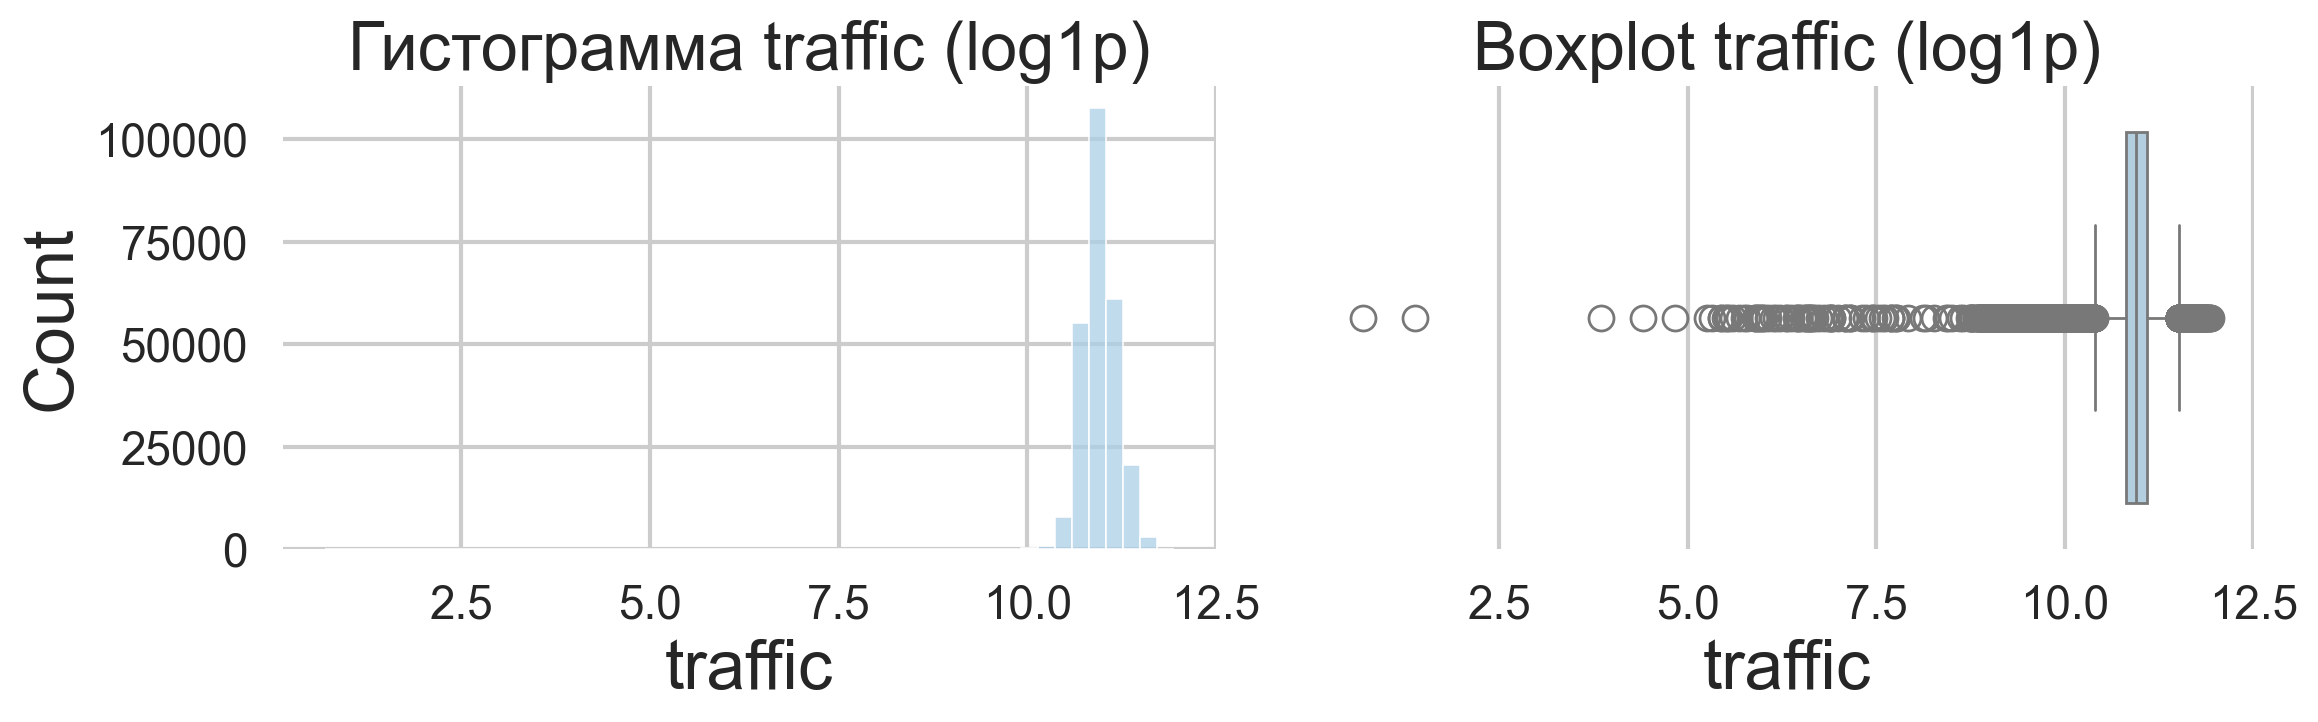

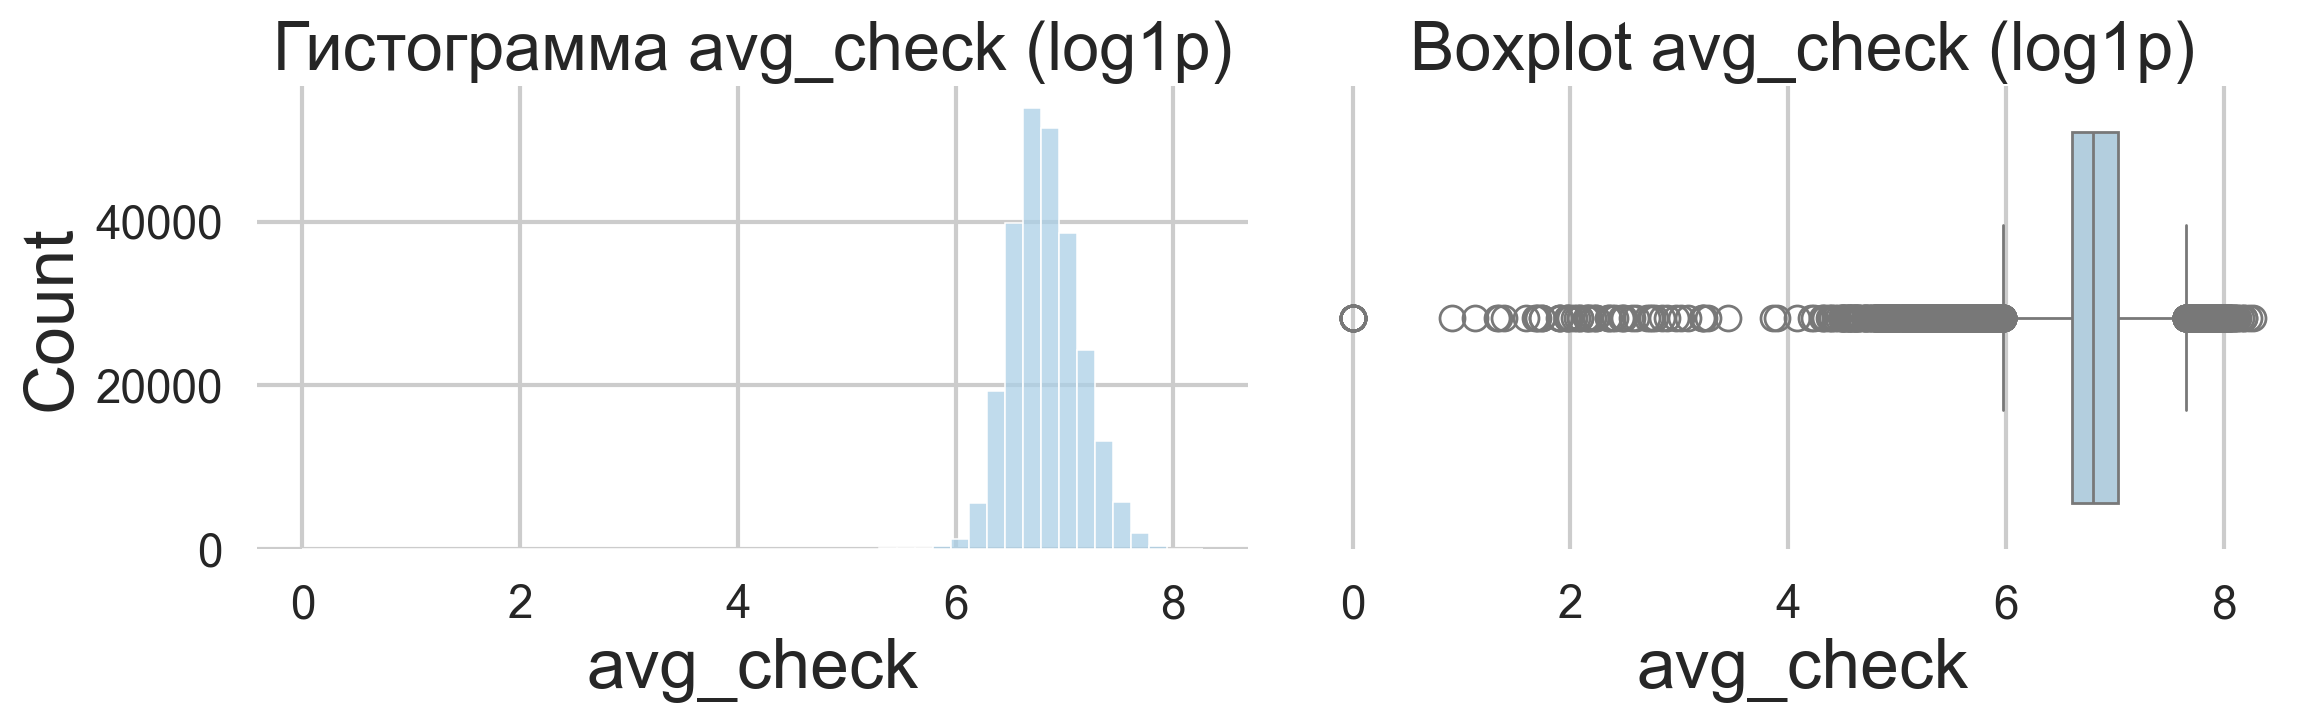

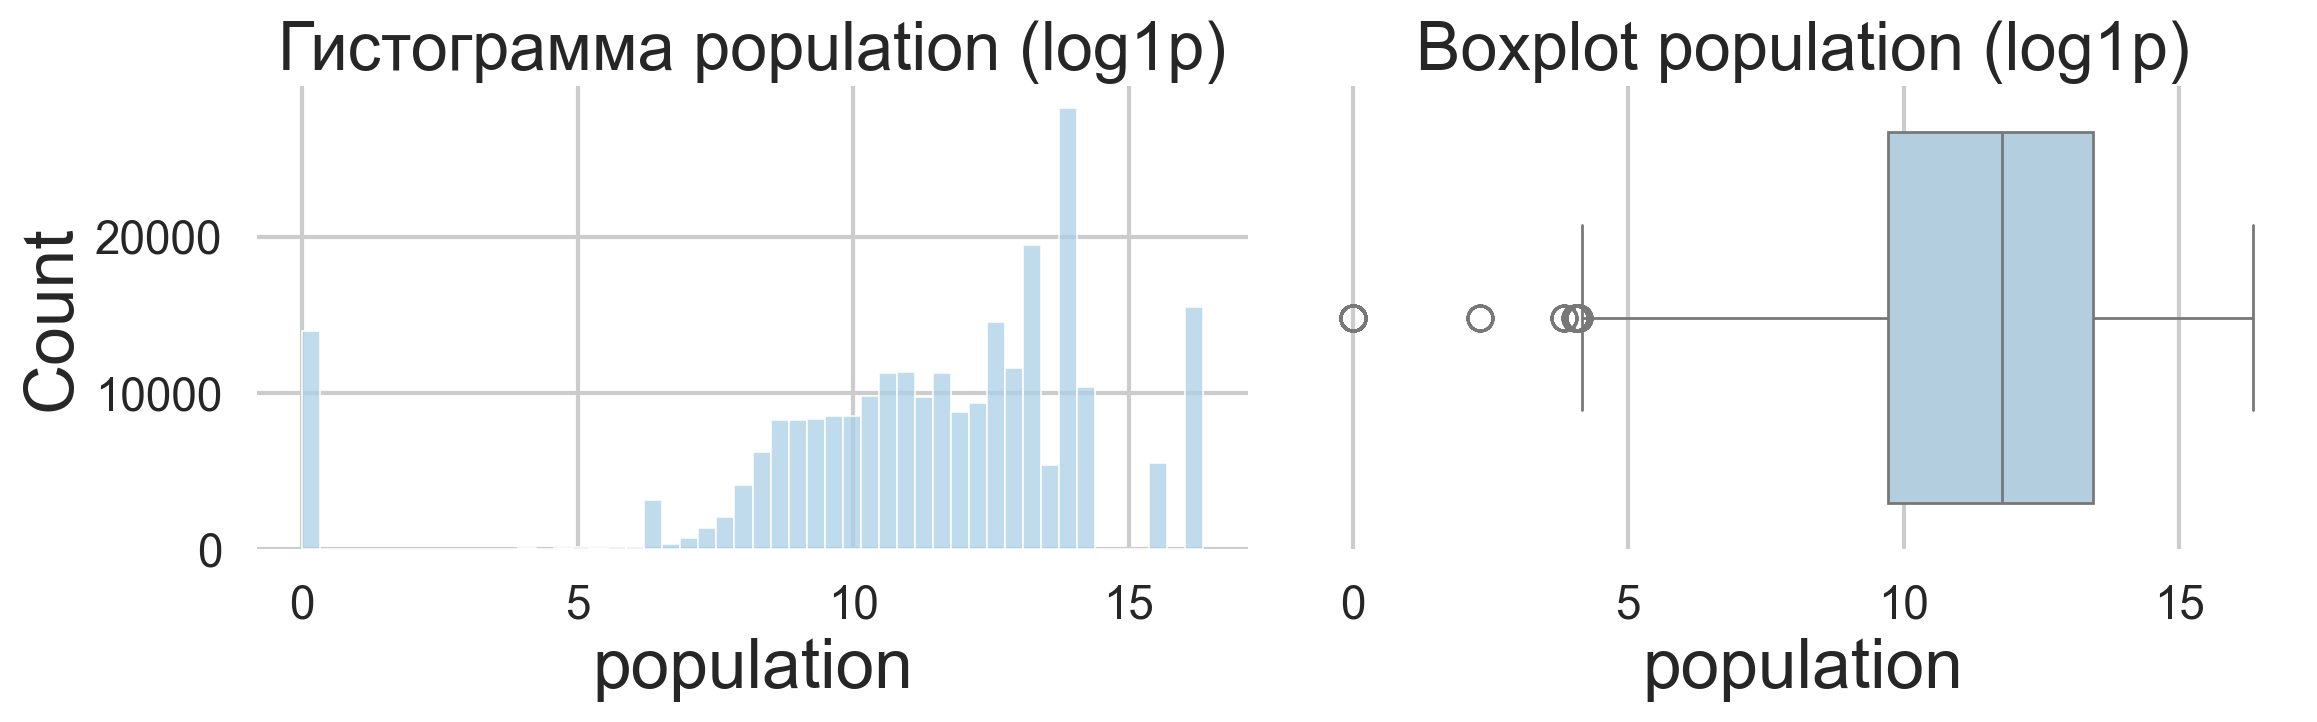

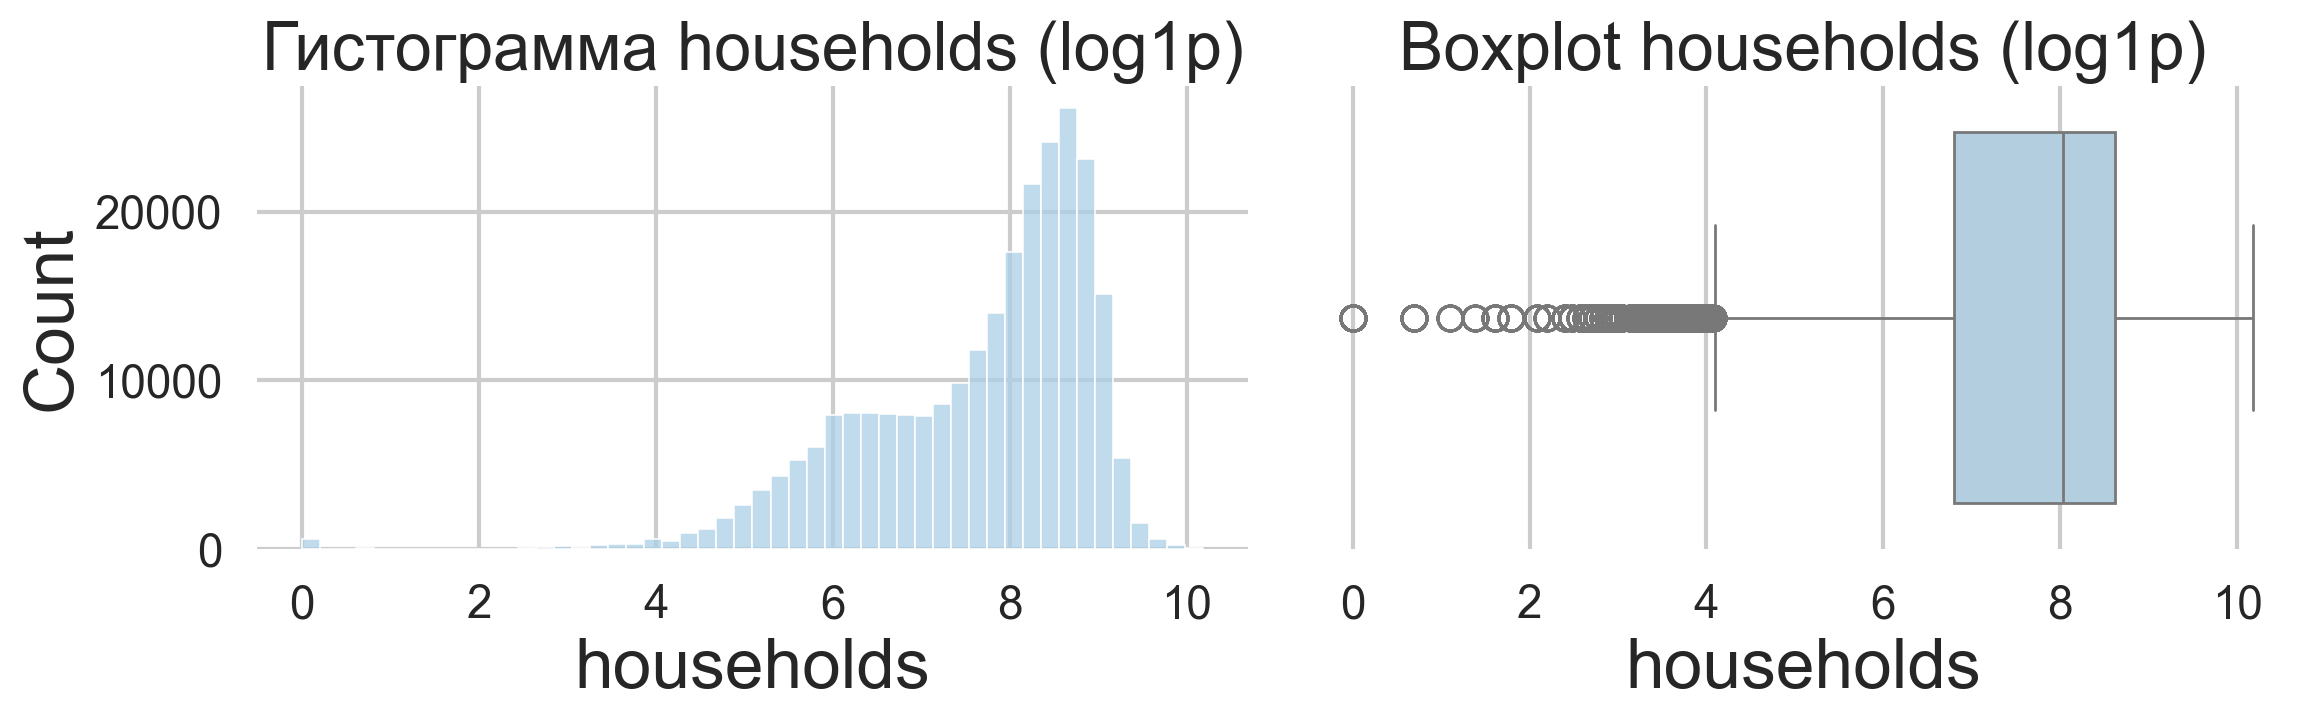

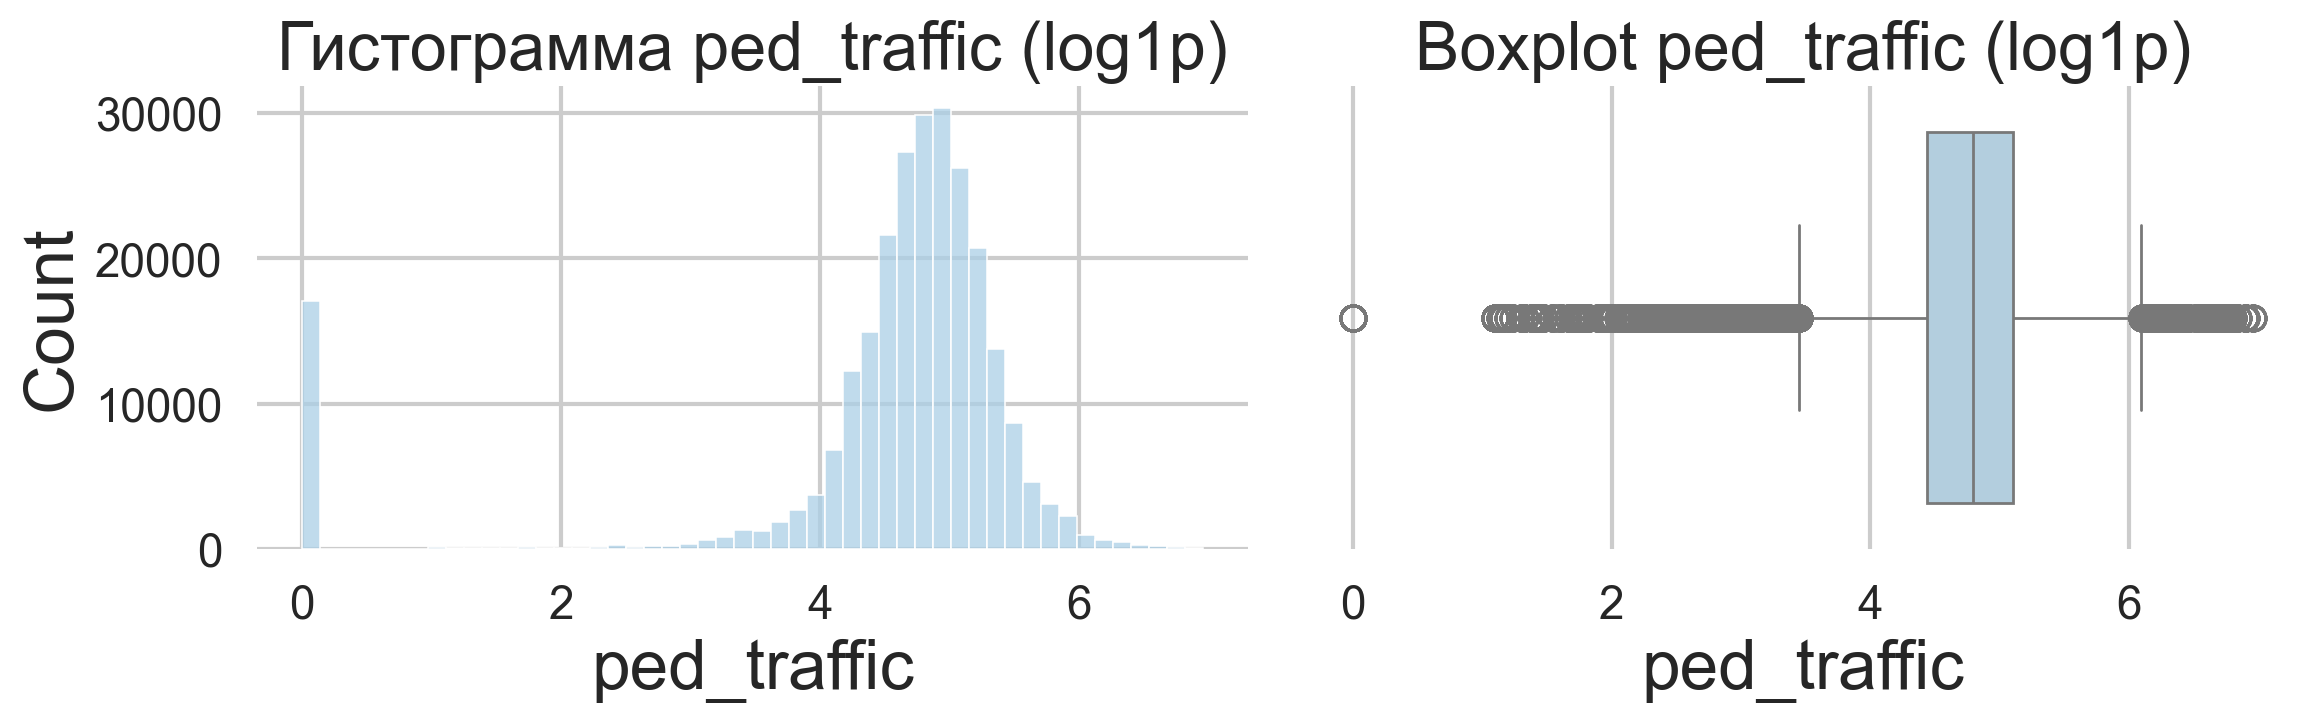

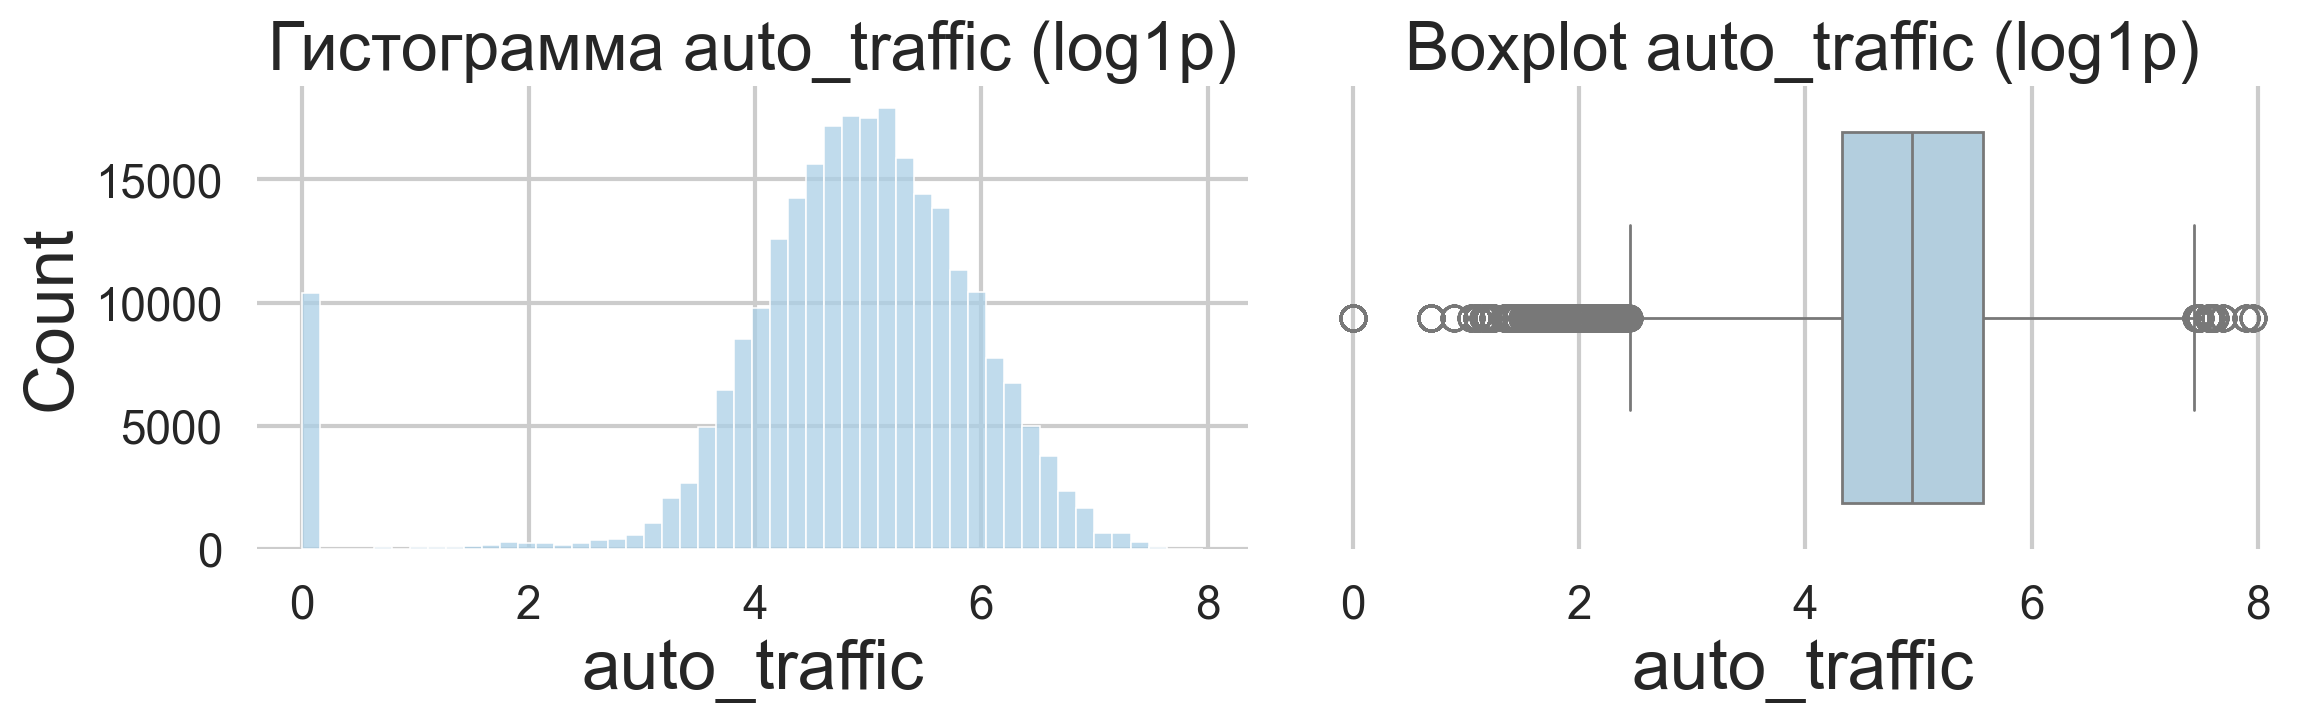

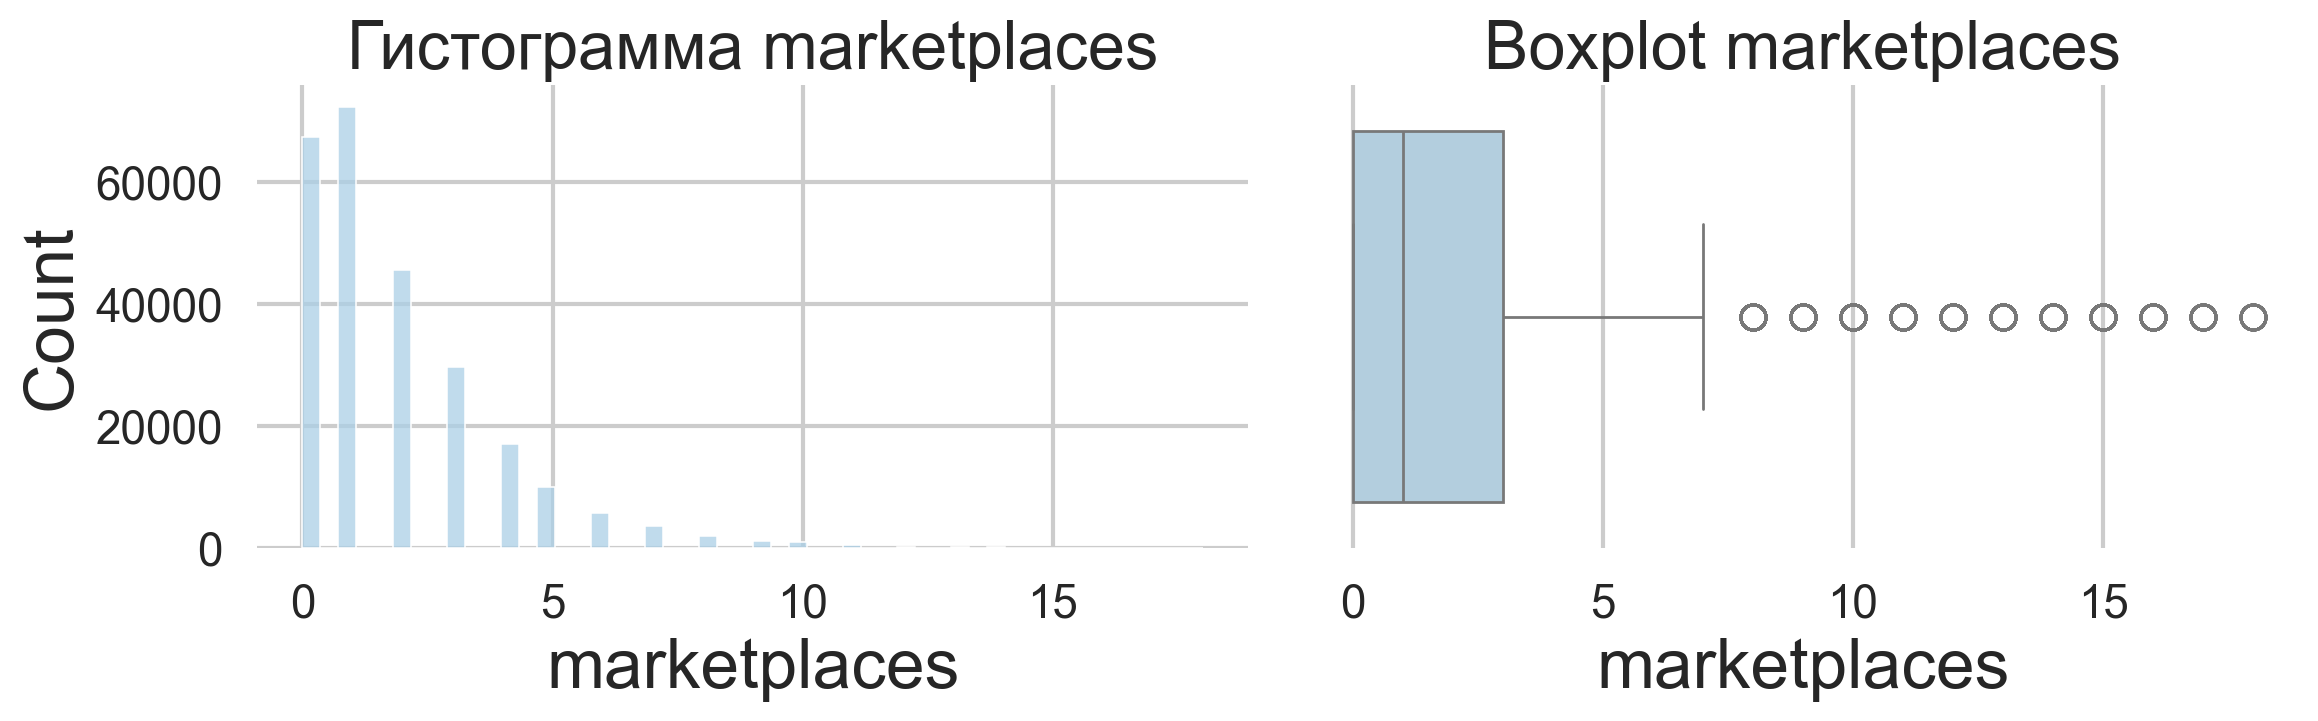

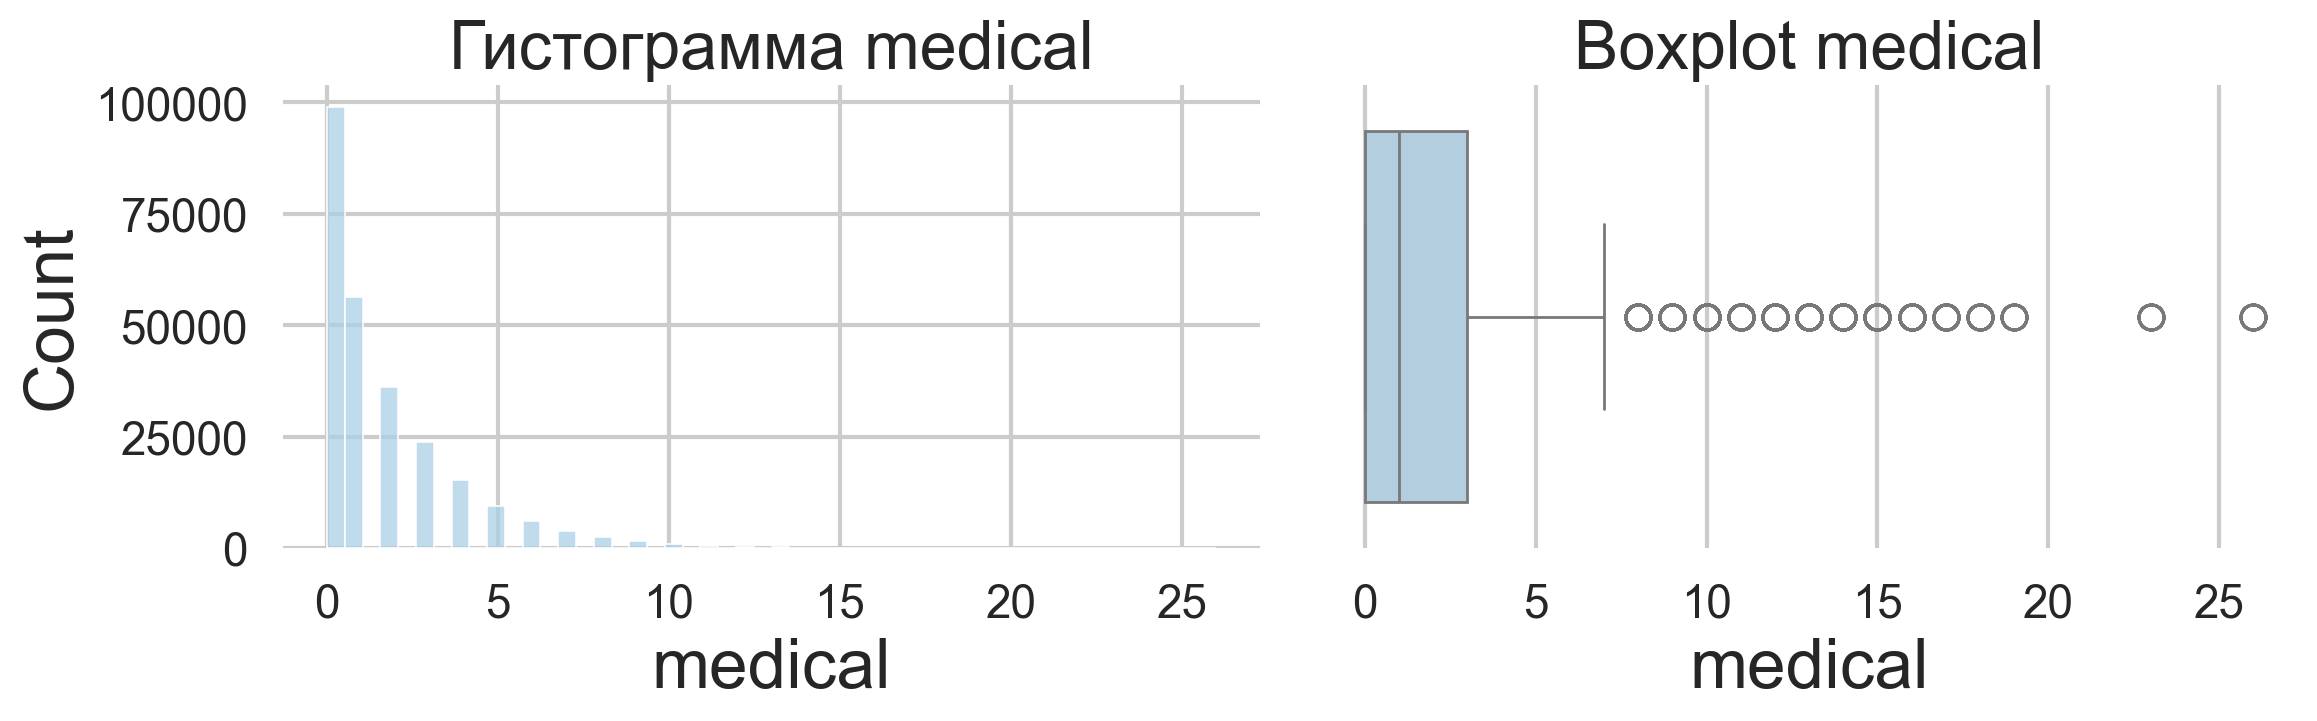

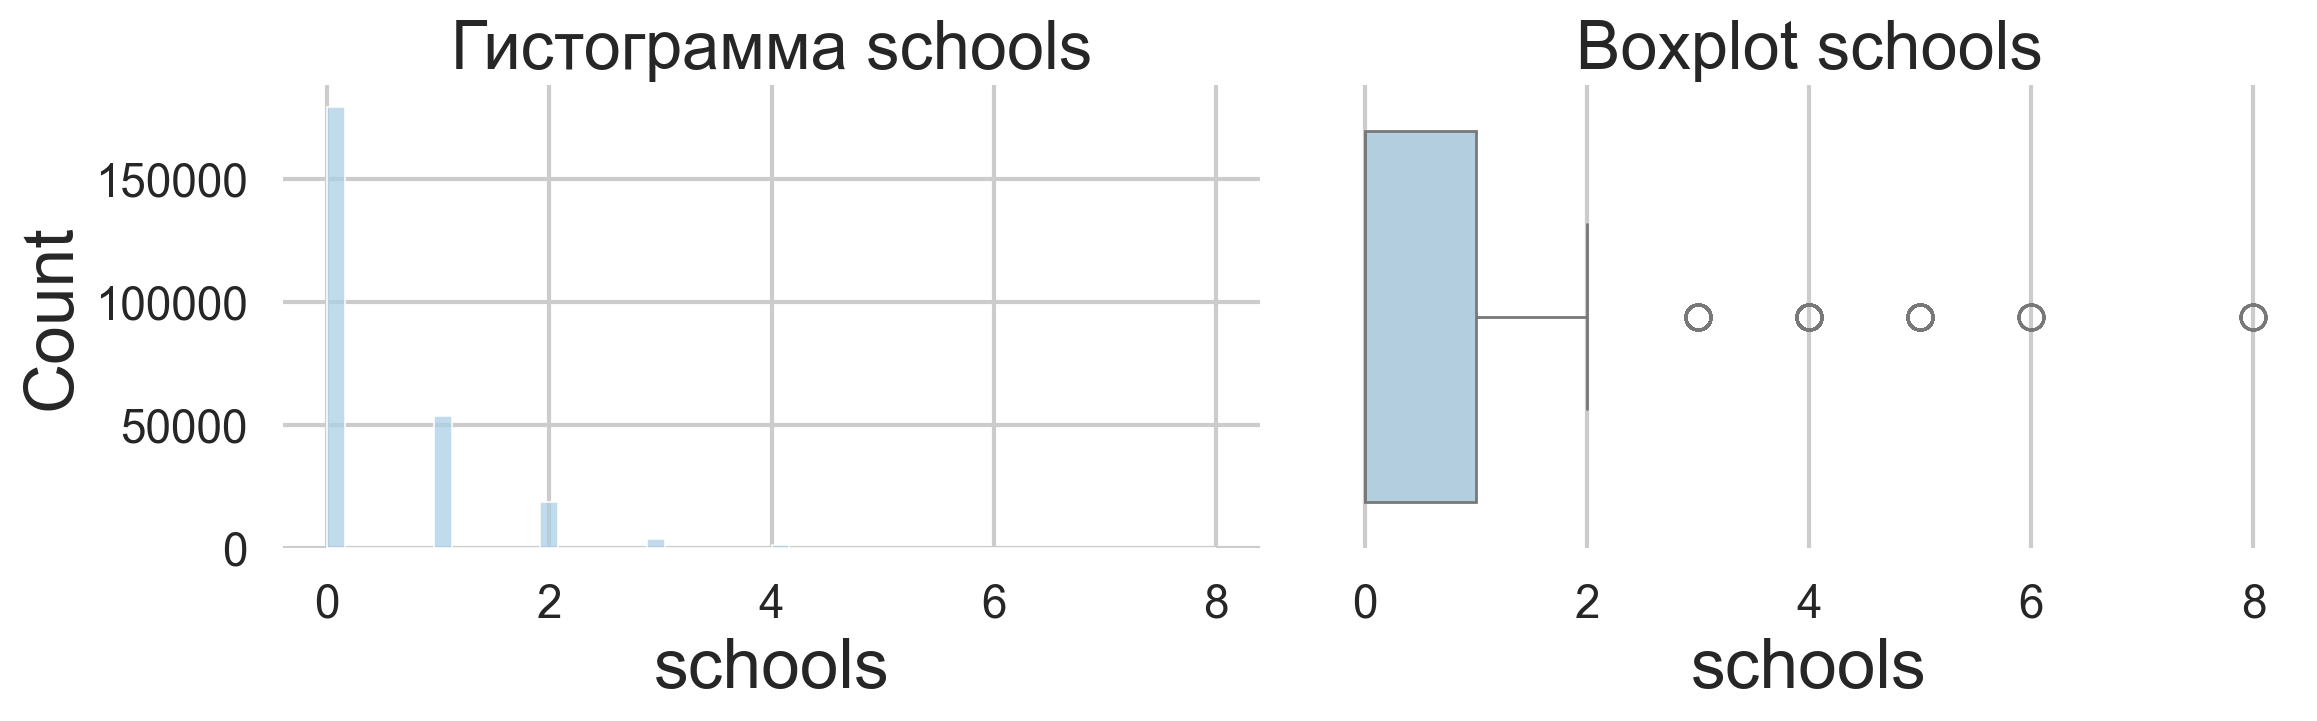

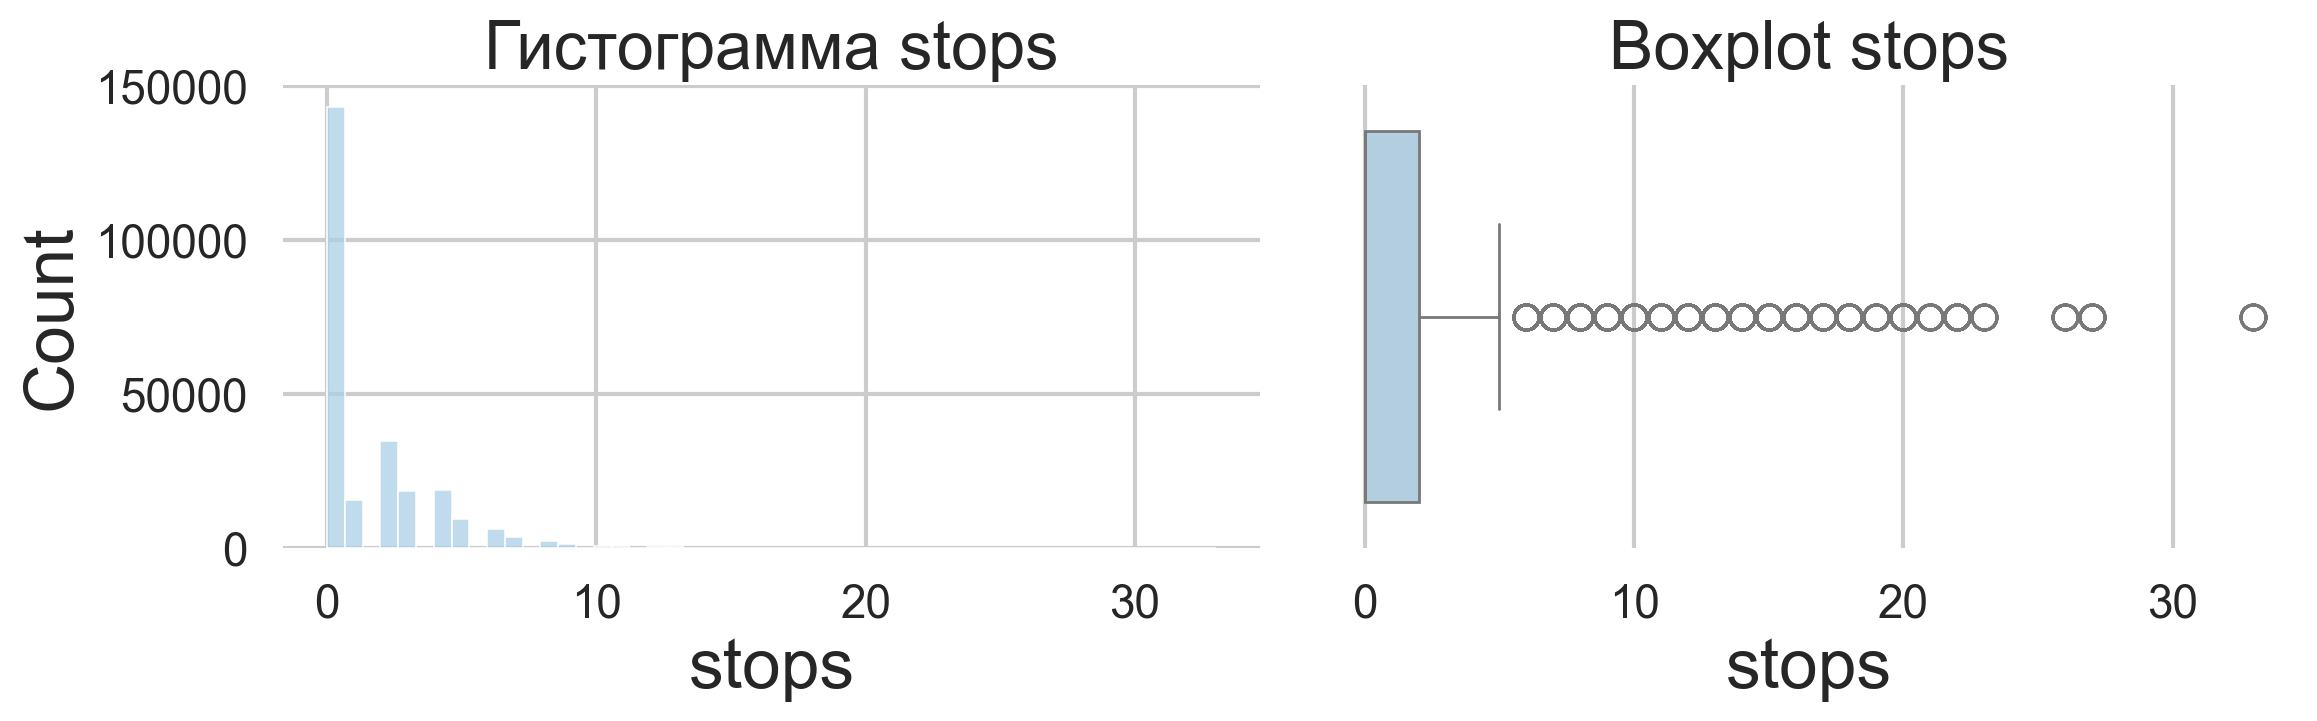

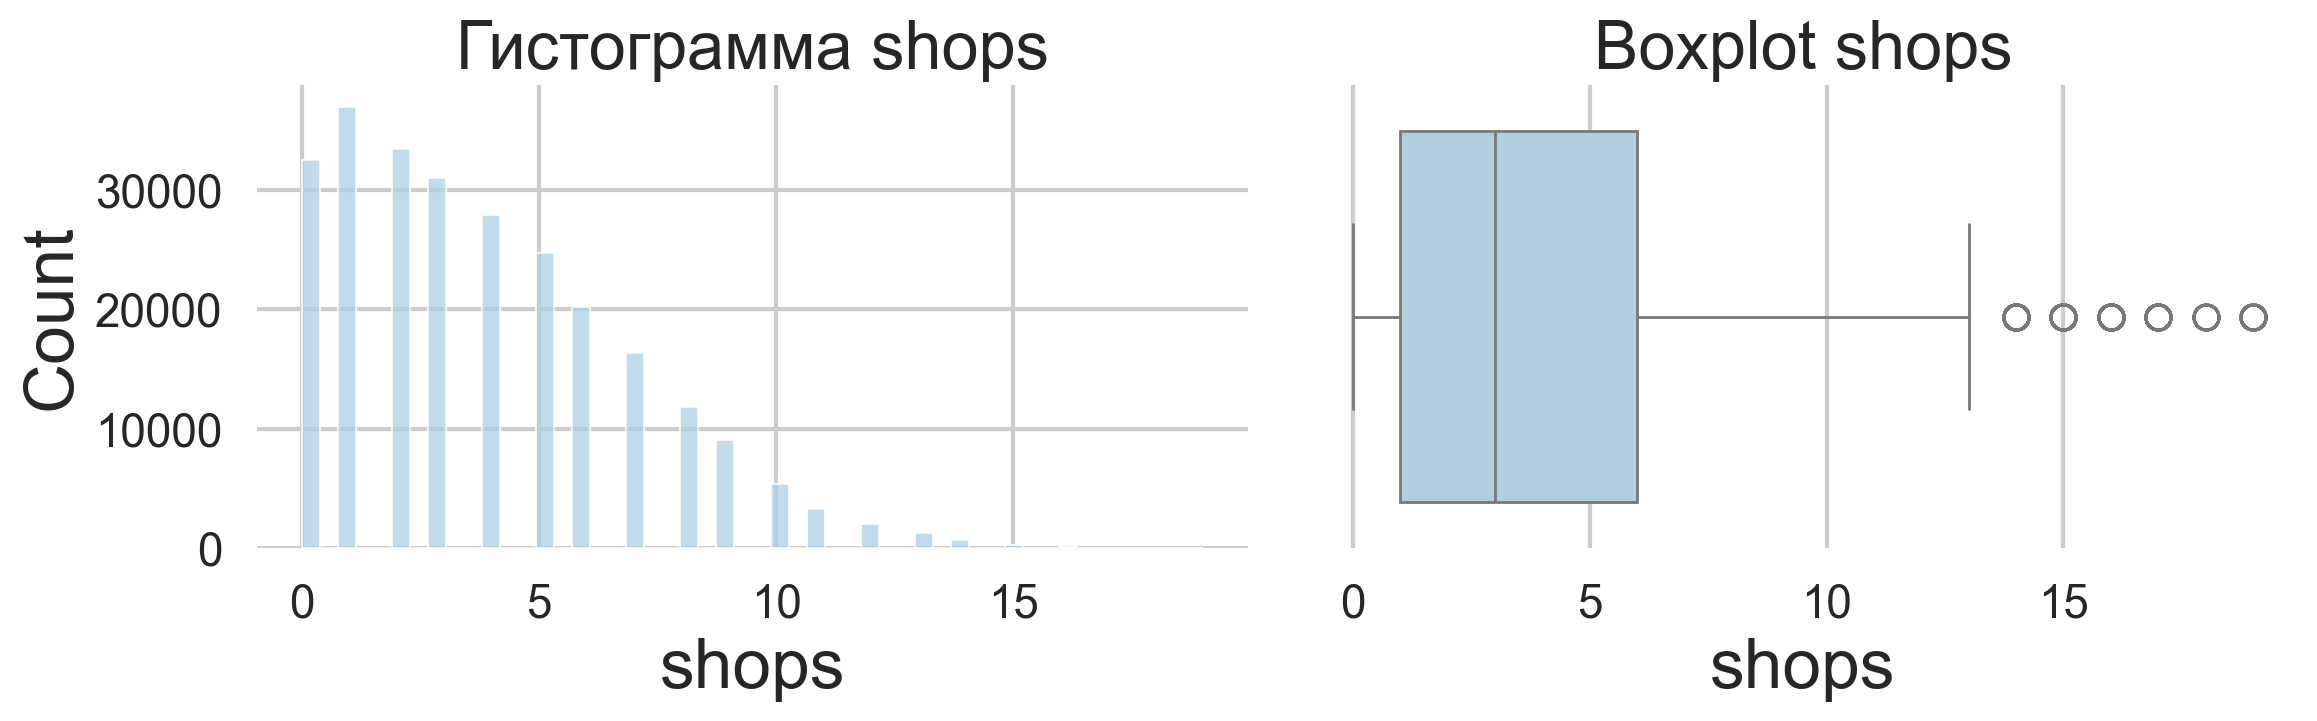

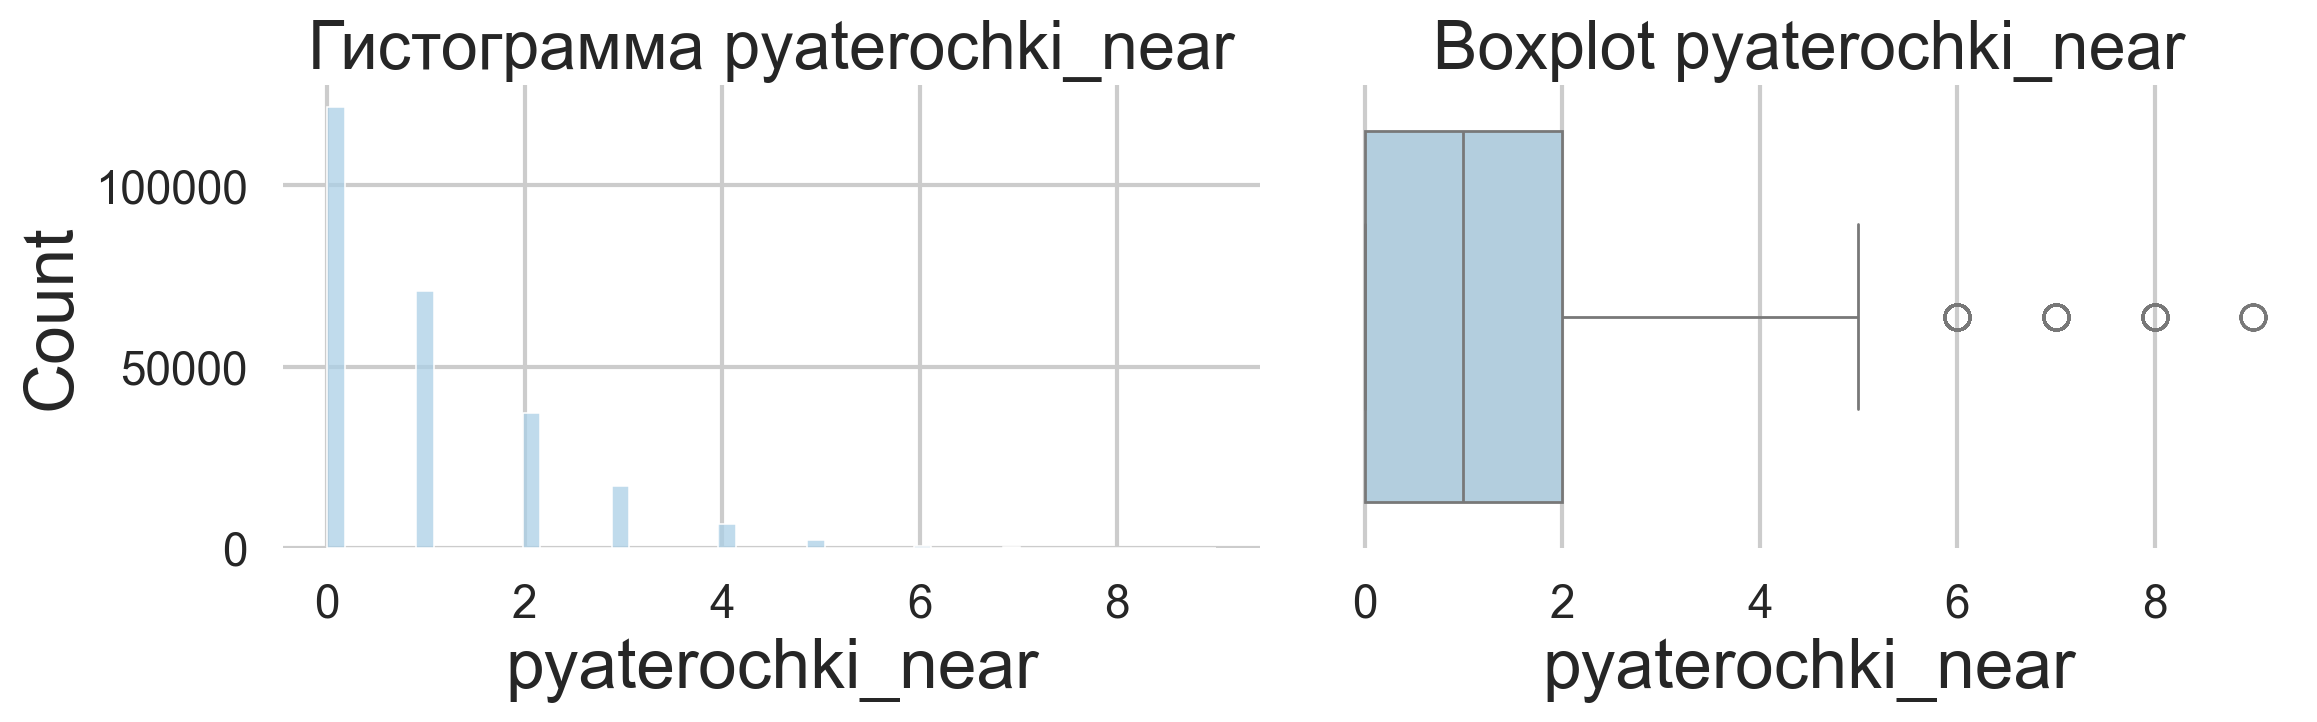

In [35]:
def plot_hist_box(data, col, log_transform=False, bins=50):
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    x = data[col].dropna()
    if log_transform:
        x_to_plot = np.log1p(x)
        title_suffix = ' (log1p)'
    else:
        x_to_plot = x
        title_suffix = ''
    # hist + kde
    sns.histplot(x_to_plot, bins=bins, ax=axes[0])
    axes[0].set_title(f'Гистограмма {col}{title_suffix}')
    # boxplot
    sns.boxplot(x=x_to_plot, orient='h', ax=axes[1])
    axes[1].set_title(f'Boxplot {col}{title_suffix}')
    plt.tight_layout()
    plt.show()

# Список колонок для визуализации
visual_cols =  [cols[name] for name in [
    'Трафик',
    'Средний чек',
    'Численность населения',
    'Количество домохозяйств',
    'Трафик пеший, в час',
    'Трафик авто, в час',
    'Маркетплейсы, доставки, постаматы (100 м)',
    'Медицинские уч. и аптеки (300 м)',
    'Школы (300 м)',
    'Остановки (300 м)',
    'Продуктовые магазины (500 м)',
    'Пятерочки (500 м)'
]]

# Рисуем графики; для очевидно скошенных делаем логарифм
skewed = [cols[name] for name in ['Трафик','Средний чек','Численность населения','Количество домохозяйств',
          'Трафик пеший, в час','Трафик авто, в час']]
for c in visual_cols:
    if c not in df.columns:
        continue
    plot_hist_box(df, c, log_transform=(c in skewed))


### все более менее нормально кроме:
1. очень много значений для трафика между 5 и 10
2. тоже самое с чеком, распределения очень смещены вправо (много между 4 и 6)
3. хвост у домовладений, но это ожидаемо и он небольшой
4. у трафика по категориям то же самое что у чека и у самого трафика
5. много нулевого пешеходного и автомобильного трафика 


Посмотрим, что там по выбросам

In [39]:
def find_iqr_outliers(series, k=1.5):
    s = series.dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    mask = (series < lower) | (series > upper)
    return mask, lower, upper, q1, q3, iqr

outlier_summary = []
outlier_masks = pd.DataFrame(index=df.index)

for c in visual_cols:
    if c not in df.columns:
        continue
    mask, lower, upper, q1, q3, iqr = find_iqr_outliers(df[c])
    outlier_masks[f'out_{c}'] = mask.fillna(False)
    count = mask.sum()
    pct = count / df.shape[0] * 100
    outlier_summary.append({
        'col': c, 'count': int(count), 'pct': pct,
        'q1': q1, 'q3': q3, 'iqr': iqr, 'lower': lower, 'upper': upper
    })

out_df = pd.DataFrame(outlier_summary).sort_values('pct', ascending=False)
display(out_df)


col  count       pct            q1             q3  \
2         population  21045  8.197551  16675.000000  684709.000000   
5       auto_traffic  17013  6.626987     74.333333     262.666667   
9              stops  16433  6.401063      0.000000       2.000000   
4        ped_traffic   9749  3.797478     83.900000     163.357143   
1          avg_check   8573  3.339397    739.827669    1126.586033   
0            traffic   8029  3.127495  49697.000000   65801.000000   
7            medical   6455  2.514383      0.000000       3.000000   
6       marketplaces   5355  2.085906      0.000000       3.000000   
8            schools   5198  2.024750      0.000000       1.000000   
3         households   1801  0.701534    898.000000    5516.000000   
10             shops   1110  0.432373      1.000000       6.000000   
11  pyaterochki_near    877  0.341613      0.000000       2.000000   

              iqr          lower         upper  
2   668034.000000 -985376.000000  1.686760e+06  
5      188.333334    -208.166668  5.451667e+02  
9        2.000000      -3.000000  5.000000e+00  
4       79.457143     -35.285714  2.825429e+02  
1      386.758364     159.690124  1.706724e+03  
0    16104.000000   25541.000000  8.995700e+04  
7        3.000000      -4.500000  7.500000e+00  
6        3.000000      -4.500000  7.500000e+00  
8        1.000000      -1.500000  2.500000e+00  
3     4618.000000   -6029.000000  1.244300e+04  
10       5.000000      -6.500000  1.350000e+01  
11       2.000000      -3.000000  5.000000e+00

выше в таблице это:
1. `count` - Количество наблюдений (строк), которые считаются выбросами по правилу x < Q1−1.5IQR или x > Q3+1.5IQR
2. `pct` - То же самое, но в процентах: доля выбросов от общего числа строк. 
3. `q1` — Первый квартиль (25-я перцентиль); значение, ниже которого находится 25% данных.
4. `q3` — Третий квартиль (75-я перцентиль); значение, ниже которого находится 75% данных.
5. `iqr` — Межквартильный размах:
IQR = Q3 − Q1.
Показывает ширину коробки в boxplot.
6. `lower` — Нижняя теоретическая граница «усов» (граница определения выбросов):
lower = Q1 − 1.5·IQR.
Все значения ниже этой границы считаются выбросами.
7. `upper` — Верхняя теоретическая граница «усов»:
upper = Q3 + 1.5·IQR.
Все значения выше этой границы считаются выбросами.

## Сводная таблица

In [57]:
report = out_df.copy()
report['mean'] = df[report['col']].mean().values
report['median'] = df[report['col']].median().values
report['std'] = df[report['col']].std().values
report = report[['col','mean','median','std','count','pct','q1','q3','iqr','lower','upper']]
display(report)
report.to_csv('outlier_report_iqr.csv', index=False)


col          mean         median           std  count  \
2         population  1.184431e+06  131942.000000  3.003150e+06  21045   
5       auto_traffic  2.042530e+02     139.800000  2.063808e+02  17013   
9              stops  1.538351e+00       0.000000  2.375176e+00  16433   
4        ped_traffic  1.290137e+02     120.050000  8.160198e+01   9749   
1          avg_check  9.663075e+02     901.419357  3.236862e+02   8573   
0            traffic  5.881353e+04   56632.000000  1.354604e+04   8029   
7            medical  1.696681e+00       1.000000  2.164835e+00   6455   
6       marketplaces  1.875769e+00       1.000000  2.015292e+00   5355   
8            schools  4.212556e-01       0.000000  7.446908e-01   5198   
3         households  3.553130e+03    3072.000000  2.932750e+03   1801   
10             shops  3.855132e+00       3.000000  3.055542e+00   1110   
11  pyaterochki_near  9.361413e-01       1.000000  1.164317e+00    877   

         pct            q1             q3            iqr          lower  \
2   8.197551  16675.000000  684709.000000  668034.000000 -985376.000000   
5   6.626987     74.333333     262.666667     188.333334    -208.166668   
9   6.401063      0.000000       2.000000       2.000000      -3.000000   
4   3.797478     83.900000     163.357143      79.457143     -35.285714   
1   3.339397    739.827669    1126.586033     386.758364     159.690124   
0   3.127495  49697.000000   65801.000000   16104.000000   25541.000000   
7   2.514383      0.000000       3.000000       3.000000      -4.500000   
6   2.085906      0.000000       3.000000       3.000000      -4.500000   
8   2.024750      0.000000       1.000000       1.000000      -1.500000   
3   0.701534    898.000000    5516.000000    4618.000000   -6029.000000   
10  0.432373      1.000000       6.000000       5.000000      -6.500000   
11  0.341613      0.000000       2.000000       2.000000      -3.000000   

           upper  
2   1.686760e+06  
5   5.451667e+02  
9   5.000000e+00  
4   2.825429e+02  
1   1.706724e+03  
0   8.995700e+04  
7   7.500000e+00  
6   7.500000e+00  
8   2.500000e+00  
3   1.244300e+04  
10  1.350000e+01  
11  5.000000e+00

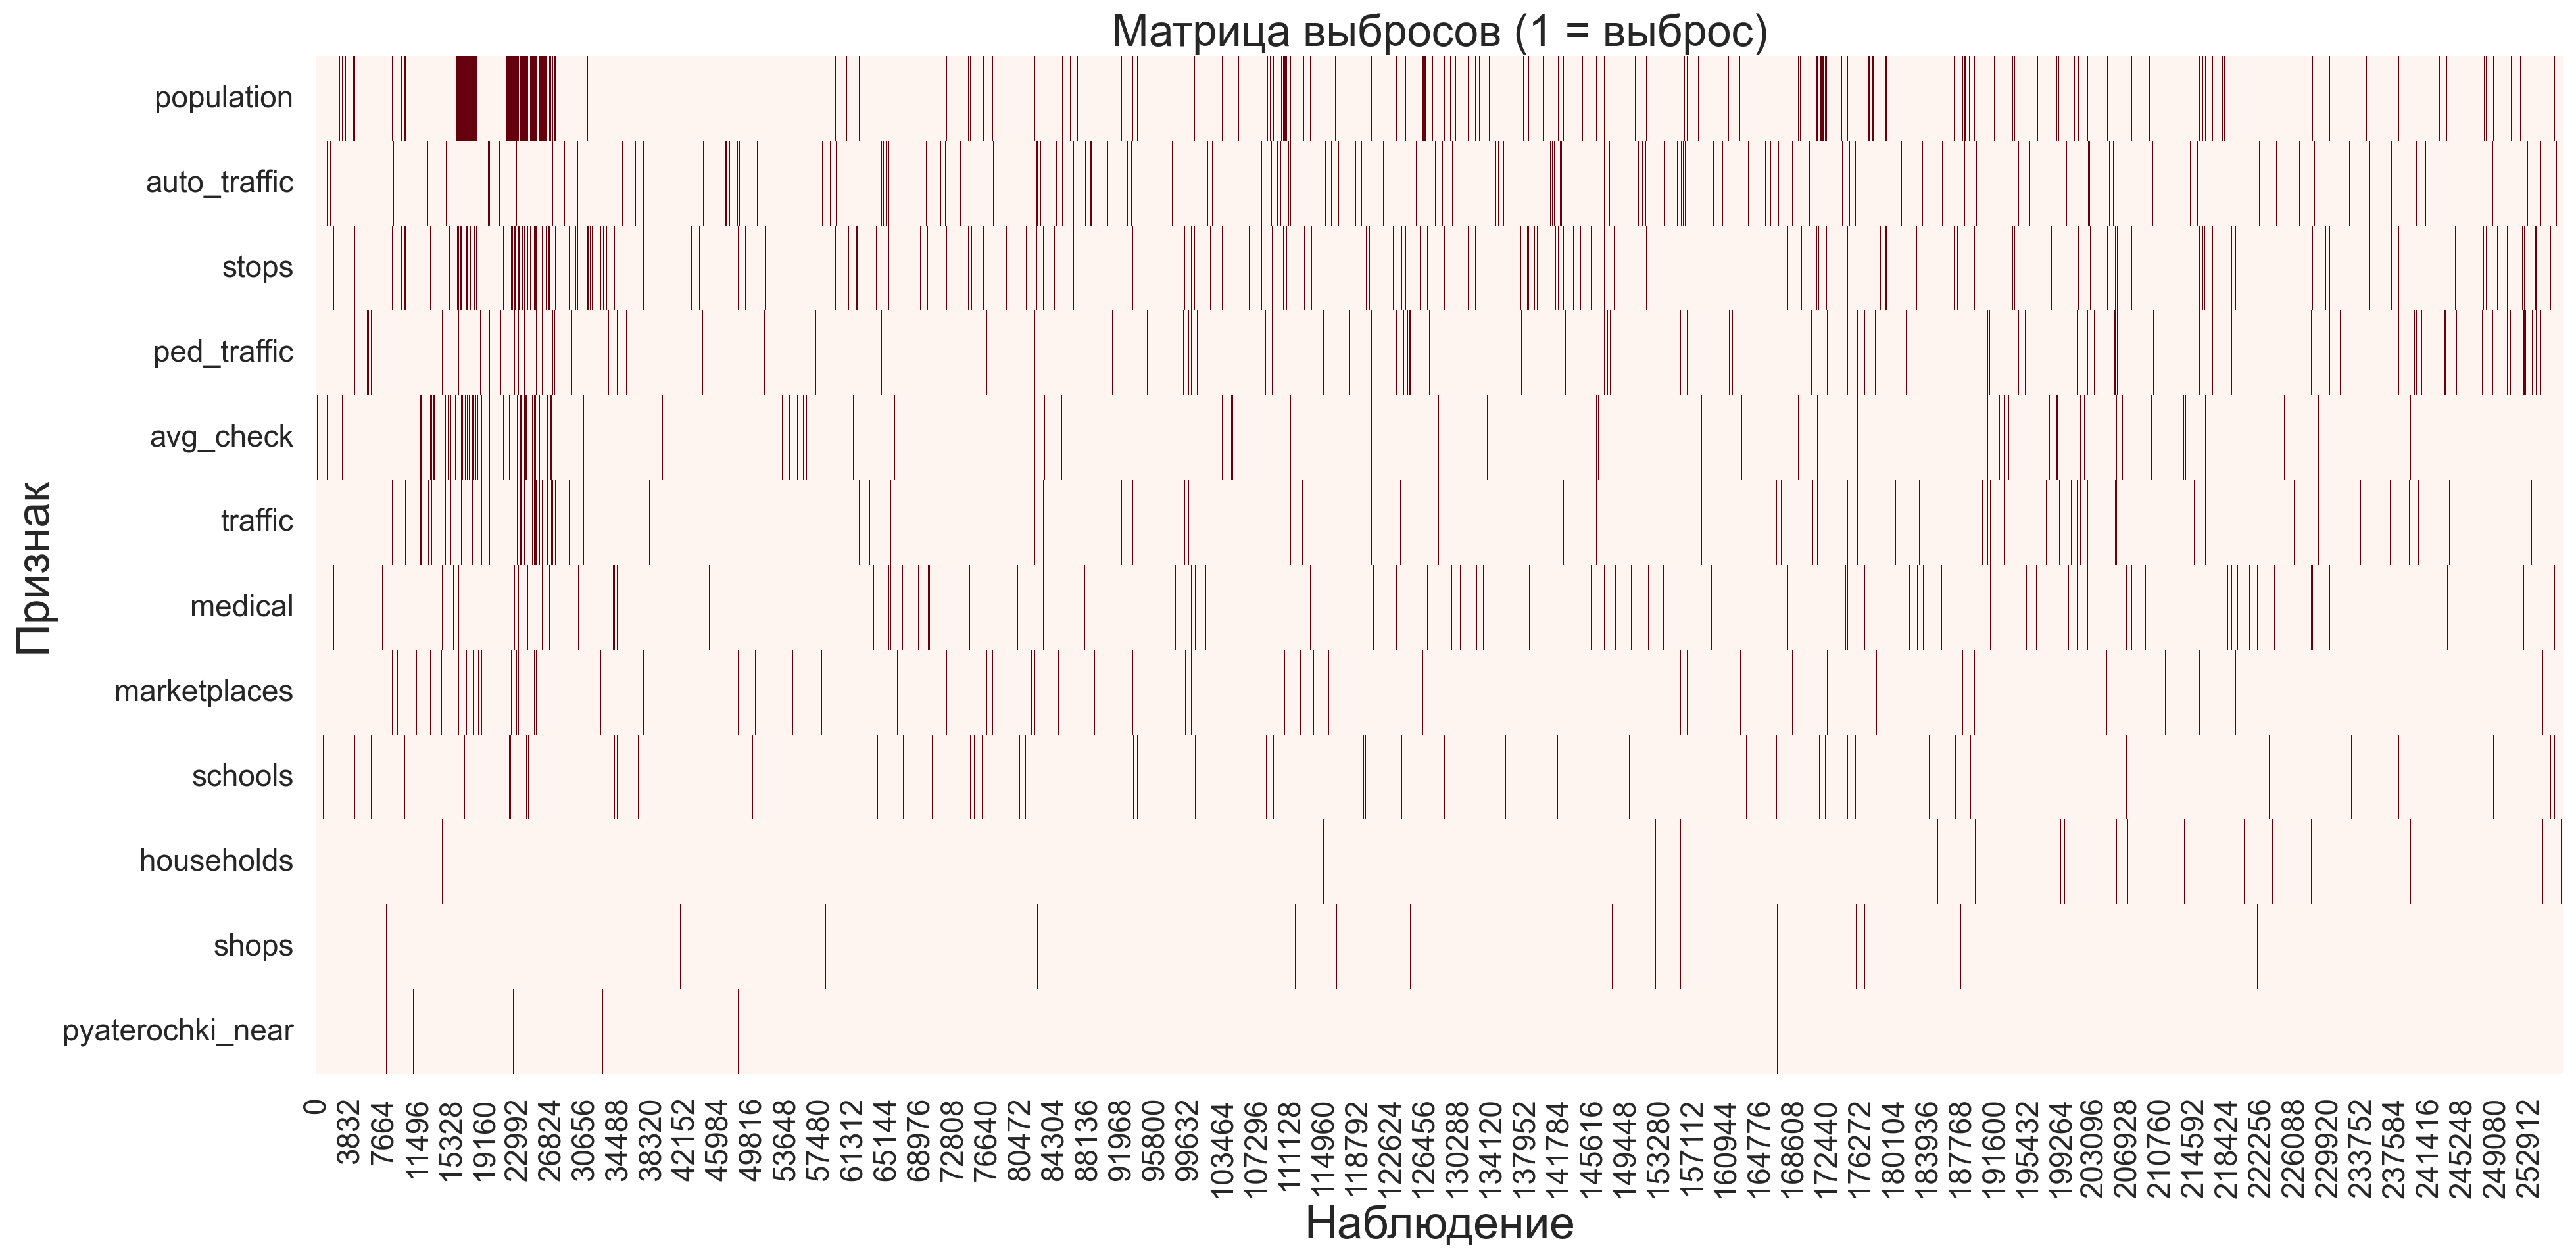

In [61]:
outlier_matrix = {}

for col in report['col'].values:
    s = df[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    outlier_matrix[col] = mask.astype(int).values

outlier_df = pd.DataFrame(outlier_matrix)

plt.figure(figsize=(20,10))
sns.heatmap(outlier_df.T, cmap="Reds", cbar=False)
plt.title("Матрица выбросов (1 = выброс)")
plt.xlabel("Наблюдение")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()


Это тепловая карта где красным помечены выбросы, но это необхективно (как могут быть выбросы в количестве жителей, например)

In [70]:
df = df[df['new_id'] != 13842]
df.to_csv(folder + "\cleaned_data_2.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Daria\AppData\Local\Temp\ipykernel_16700\3810261246.py:2: SyntaxWarning: invalid escape sequence '\c'
  df.to_csv(folder + "\cleaned_data_2.csv", index=False)


In [4]:
df = pd.read_csv(folder + "\cleaned_data_2.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Daria\AppData\Local\Temp\ipykernel_14924\1133613017.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv(folder + "\cleaned_data_2.csv")


new_id  month  traffic    avg_check            open_date     area  \
0            0     10    59662   823.060390  Средний по возрасту  Средний   
1            0      5    56674   859.361975  Средний по возрасту  Средний   
2            0      1    51488   763.937766  Средний по возрасту  Средний   
3            0      6    56693   836.362309  Средний по возрасту  Средний   
4            0      7    58128   845.257709  Средний по возрасту  Средний   
...        ...    ...      ...          ...                  ...      ...   
256694   21742     10    51676  1167.101083                Новый  Средний   
256695   21742     11    51516  1252.914118                Новый  Средний   
256696   21742      9    49593  1130.823998                Новый  Средний   
256697   21742     12    52115  1461.929305                Новый  Средний   
256698   21742      8    47294  1087.924639                Новый  Средний   

                locality              region  population  households  \
0       Кавказская ст-ца  Краснодарский край       10177         608   
1       Кавказская ст-ца  Краснодарский край       10177         608   
2       Кавказская ст-ца  Краснодарский край       10177         608   
3       Кавказская ст-ца  Краснодарский край       10177         608   
4       Кавказская ст-ца  Краснодарский край       10177         608   
...                  ...                 ...         ...         ...   
256694    Октябрьский рп   Волгоградская обл        6071         262   
256695    Октябрьский рп   Волгоградская обл        6071         262   
256696    Октябрьский рп   Волгоградская обл        6071         262   
256697    Октябрьский рп   Волгоградская обл        6071         262   
256698    Октябрьский рп   Волгоградская обл        6071         262   

        ped_traffic  auto_traffic  marketplaces  medical  schools  stops  \
0            76.900    200.333333             0        6        0      0   
1            76.900    200.333333             0        6        0      0   
2            76.900    200.333333             0        6        0      0   
3            76.900    200.333333             0        6        0      0   
4            76.900    200.333333             0        6        0      0   
...             ...           ...           ...      ...      ...    ...   
256694      125.375    243.333333             1        1        0      0   
256695      125.375    243.333333             1        1        0      0   
256696      125.375    243.333333             1        1        0      0   
256697      125.375    243.333333             1        1        0      0   
256698      125.375    243.333333             1        1        0      0   

        shops  pyaterochki_near  
0           2                 0  
1           2                 0  
2           2                 0  
3           2                 0  
4           2                 0  
...       ...               ...  
256694      1                 0  
256695      1                 0  
256696      1                 0  
256697      1                 0  
256698      1                 0  

[256699 rows x 18 columns]

## Корреляции

<Axes: >

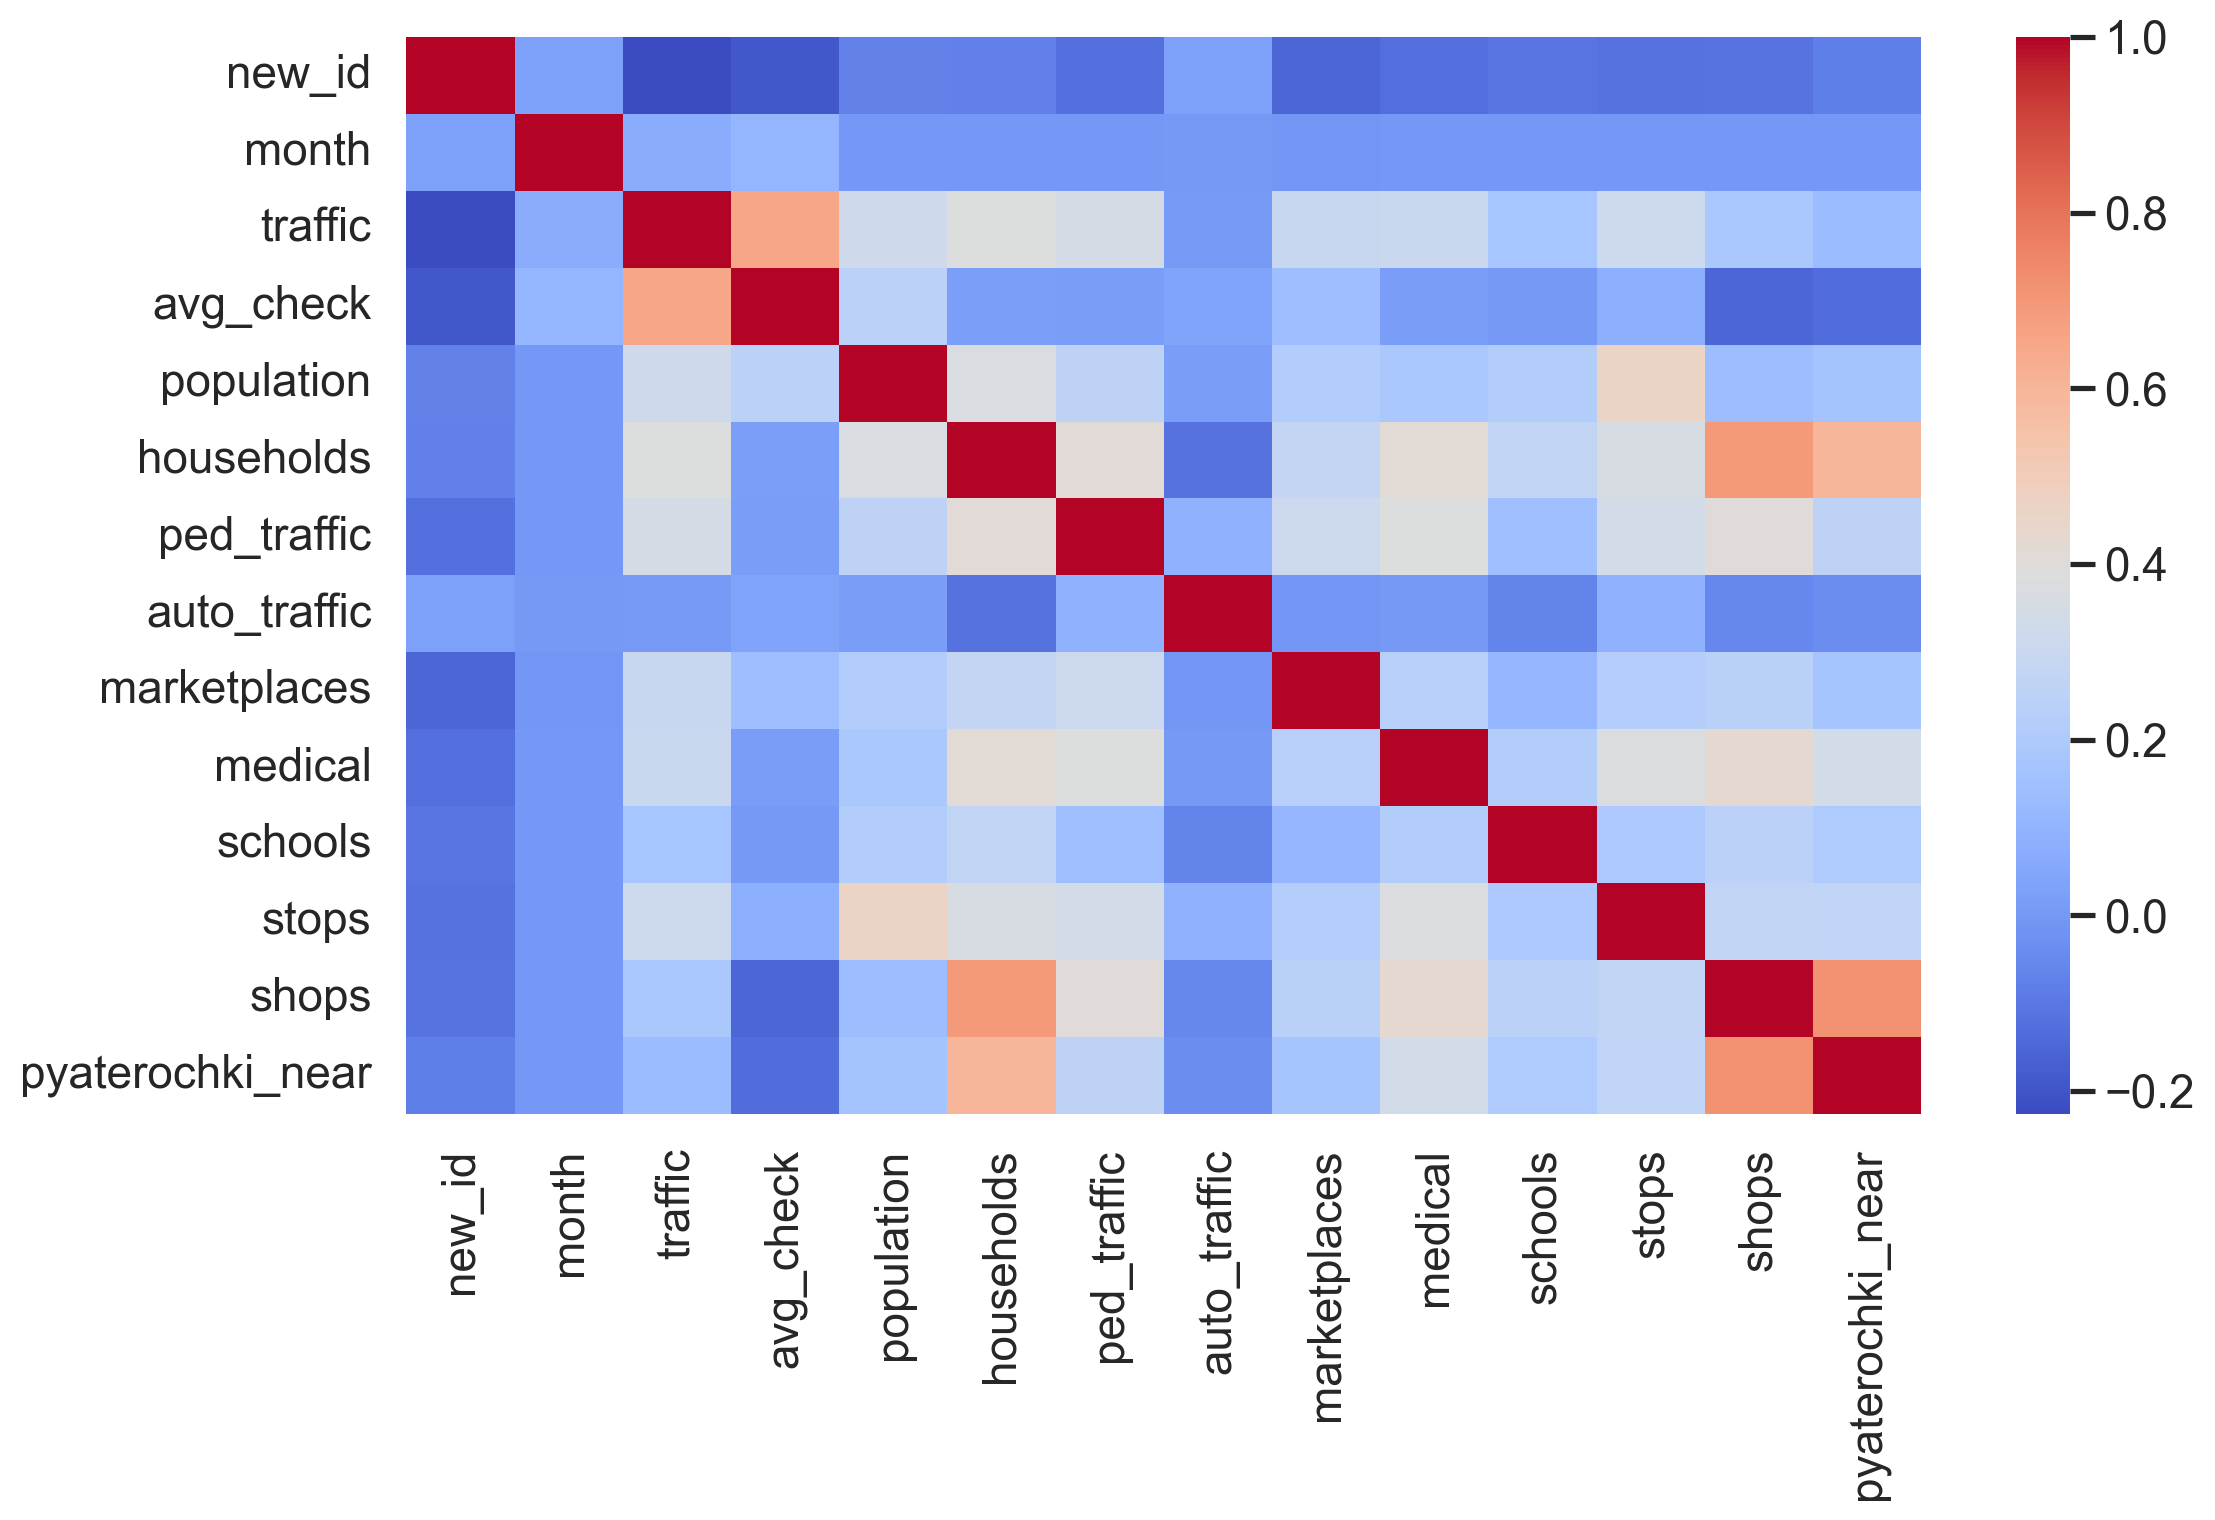

In [72]:
import seaborn as sns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")


In [7]:
import statsmodels.api as sm

X = df[[col for col in visual_cols if col != 'traffic']]
X = sm.add_constant(X)
y = df['traffic']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                traffic   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 3.952e+04
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:52:51   Log-Likelihood:            -2.6793e+06
No. Observations:              256699   AIC:                         5.359e+06
Df Residuals:                  256687   BIC:                         5.359e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              2.37e+04     63.933  

коэффициент детерминации R² = 0.629, что означает, что около 63% вариации трафика объясняется включёнными признаками. Для реальных операционных данных такой результат можно считать удовлетворительным.


### Объекты e-commerce (marketplaces)

Коэффициент равен 357.21. Наличие одного объекта e-commerce в пределах 100 м ассоциировано с увеличением трафика на `357 человек`. Это существенный эффект, подтверждающий взаимное усиление точек притяжения в городской среде.
### Медицинские учреждения и аптеки (medical)

Коэффициент равен 601.02. Наличие одного медицинского объекта в радиусе 300 м связано с ростом трафика на `600 человек`. Переменная обладает высоким вкладом в прогноз.
### Школы (schools)

Коэффициент равен 996.18. Наличие одной школы ассоциируется с увеличением трафика почти на `1000 человек`. Это один из наиболее сильных и выраженных факторов социального окружения.
### Остановки транспорта (stops)

Коэффициент равен 535.30. Наличие остановки в пределах 300 м связано с увеличением трафика на `535 человек`. Переменная отражает значимость транспортной доступности.

### Продуктовые магазины-конкуренты (shops)

Коэффициент отрицательный (–85.40). Каждое дополнительное конкурентное торговое заведение в радиусе 500 м связано со снижением трафика примерно на 85 человек. Ожидаемый результат, подтверждающий наличие конкуренции в пределах локальных рынков.

---
# Общий вывод

Наиболее сильные положительные эффекты принадлежат школам, медицинским объектам, остановкам и объектам e-commerce. Пешеходная доступность также играет важную роль. Автомобильный поток и количество конкурентов связаны с уменьшением трафика. В совокупности эти результаты подтверждают гипотезу о значимости социально-инфраструктурного окружения в формировании клиентского потока.


In [10]:
import statsmodels.api as sm

X = df[[col for col in visual_cols if col != 'avg_check']]
X = sm.add_constant(X)
y = df['avg_check']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              avg_check   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                 2.828e+04
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:46:37   Log-Likelihood:            -1.7460e+06
No. Observations:              256699   AIC:                         3.492e+06
Df Residuals:                  256687   BIC:                         3.492e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               63.5333      2.085  

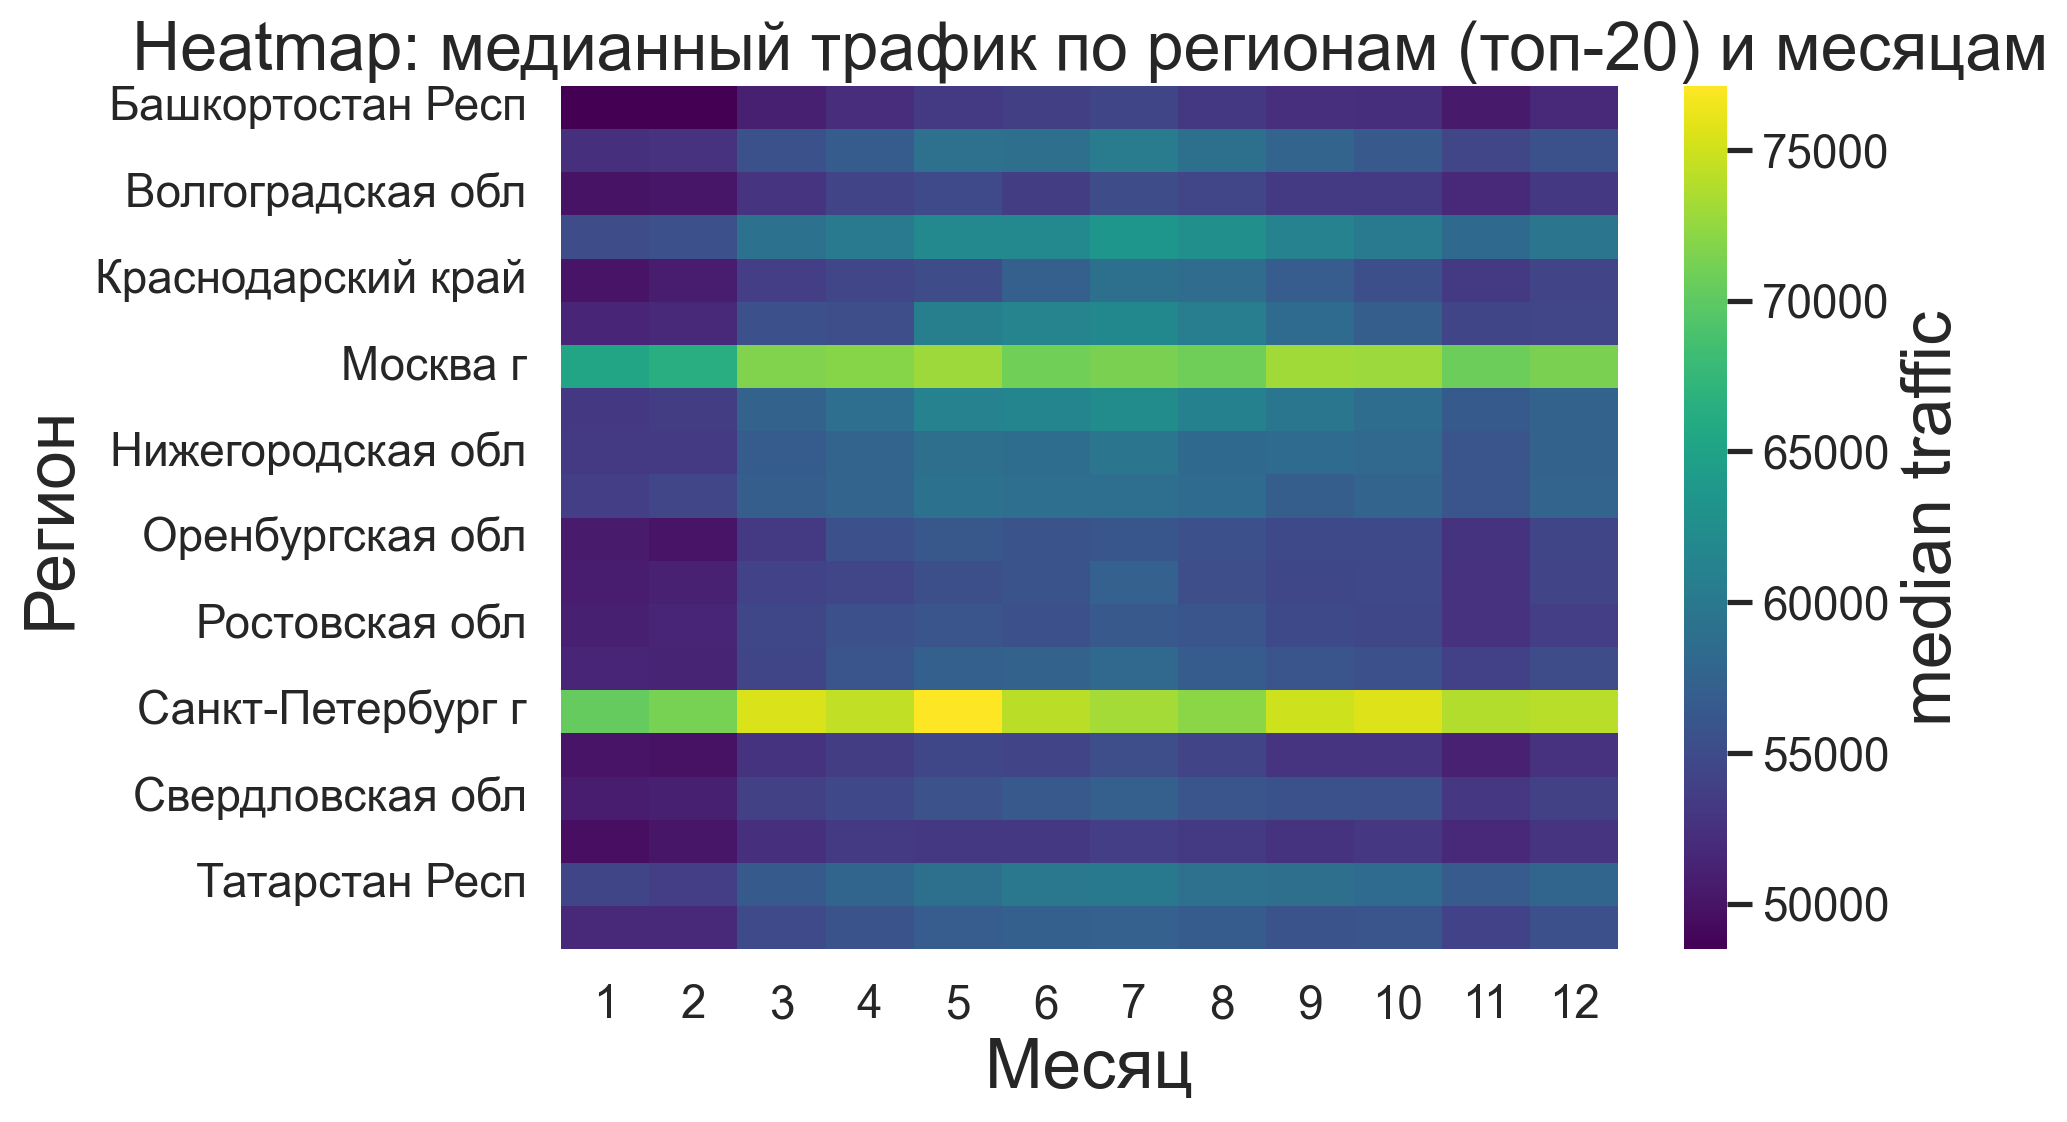

In [18]:
top_regions = df['region'].value_counts().head(20).index
pivot = df[df['region'].isin(top_regions)].groupby(['region','month'])['traffic'].median().unstack(fill_value=np.nan)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='viridis', cbar_kws={'label':'median traffic'})
plt.title('Heatmap: медианный трафик по регионам (топ-20) и месяцам')
plt.ylabel('Регион')
plt.xlabel('Месяц')
plt.tight_layout()
plt.show()

то же самое без мск и питера

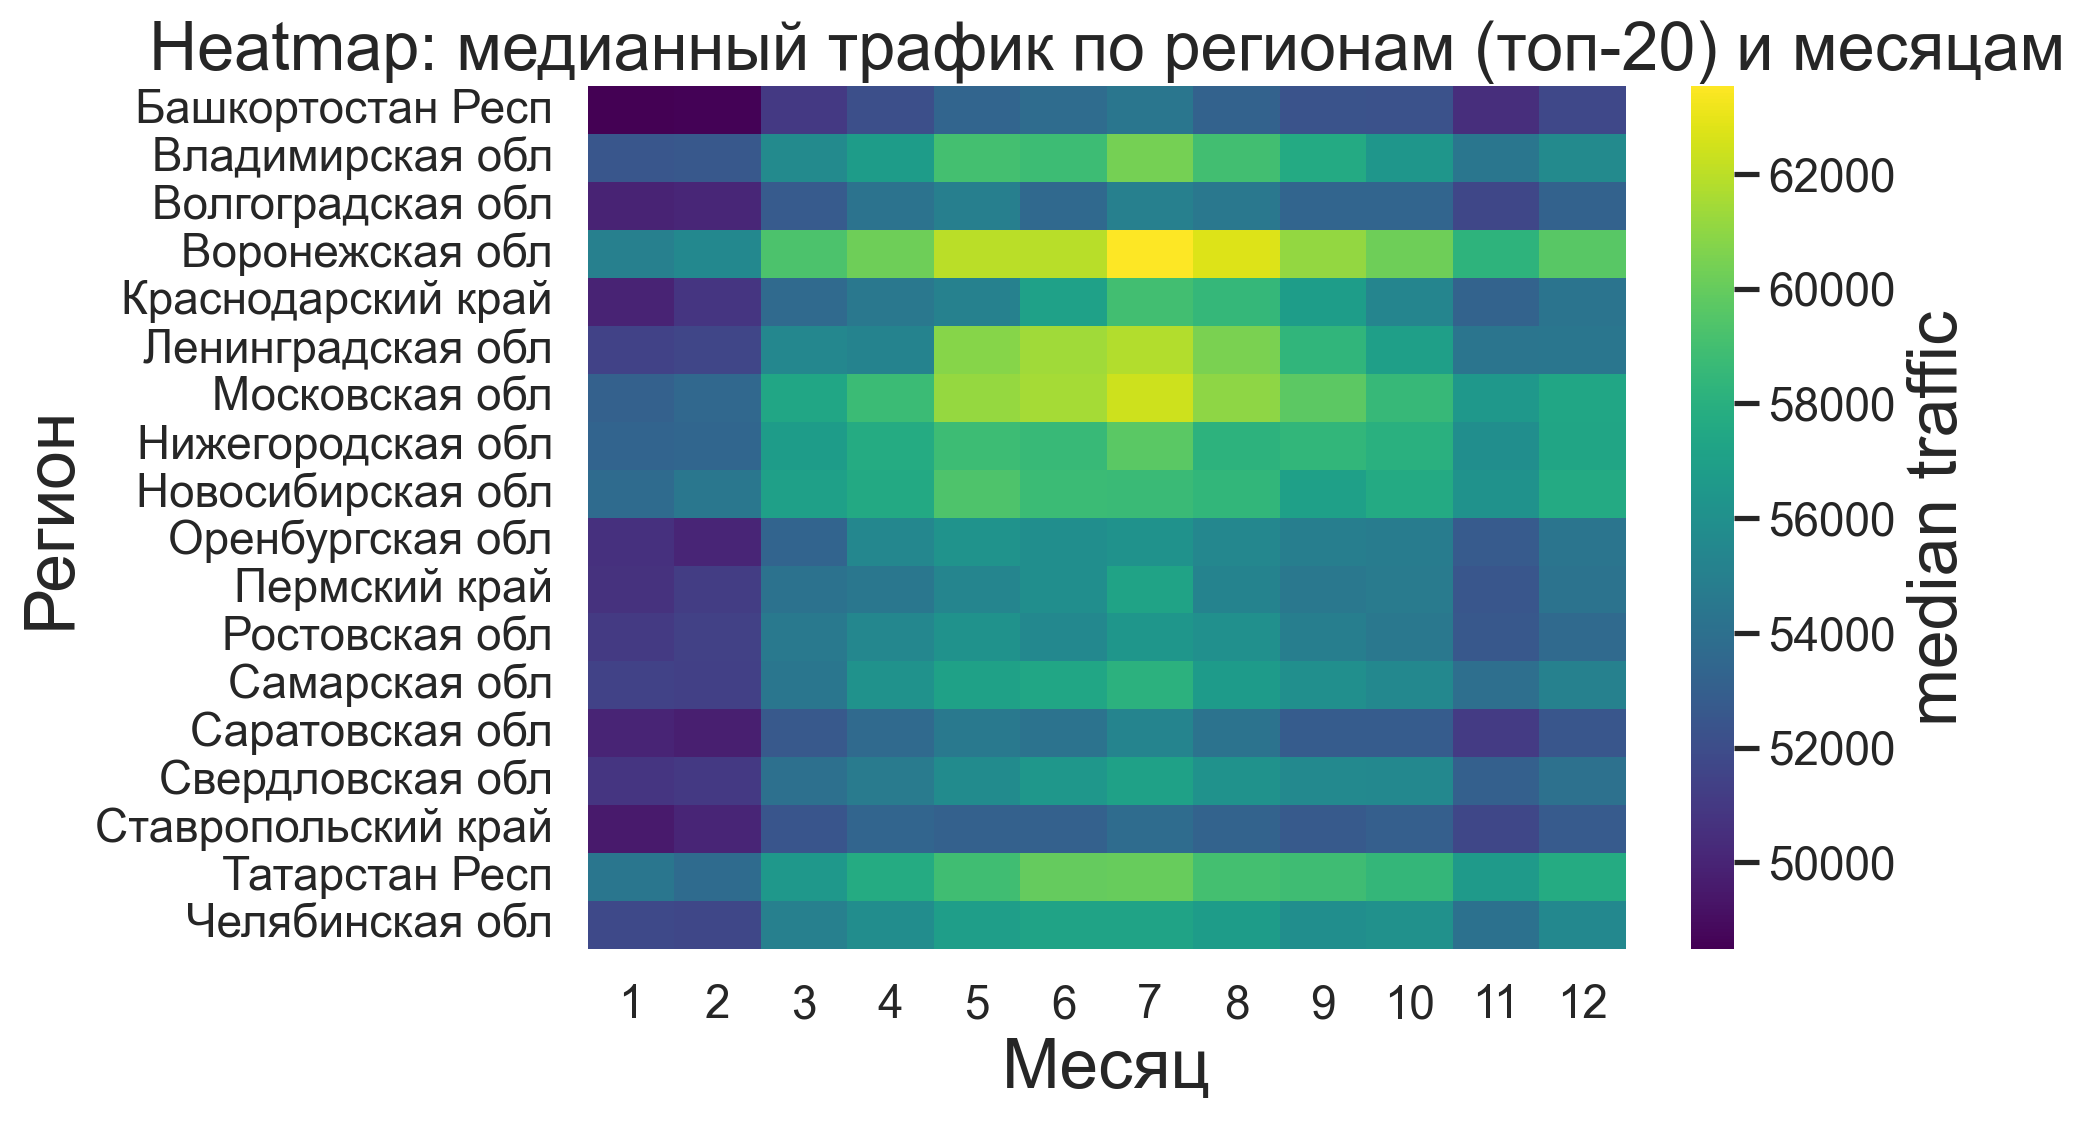

In [21]:
top_regions = df["region"].value_counts().head(20).index  # без москвы и питера
pivot = (
    df[
        (df["region"].isin(top_regions))
        & ~(df["region"].isin(["Москва г", "Санкт-Петербург г"]))
    ]
    .groupby(["region", "month"])["traffic"]
    .median()
    .unstack(fill_value=np.nan)
)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="viridis", cbar_kws={"label": "median traffic"})
plt.title("Heatmap: медианный трафик по регионам (топ-20) и месяцам")
plt.ylabel("Регион")
plt.xlabel("Месяц")
plt.tight_layout()
plt.show()

зимой в целом ходят в магазин меньше, только перед новым годом есть повышение 

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
result = kmeans.labels_
df['kmean_4'] = result

C:\Users\Daria\AppData\Local\Temp\ipykernel_10288\2694119462.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Daria\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


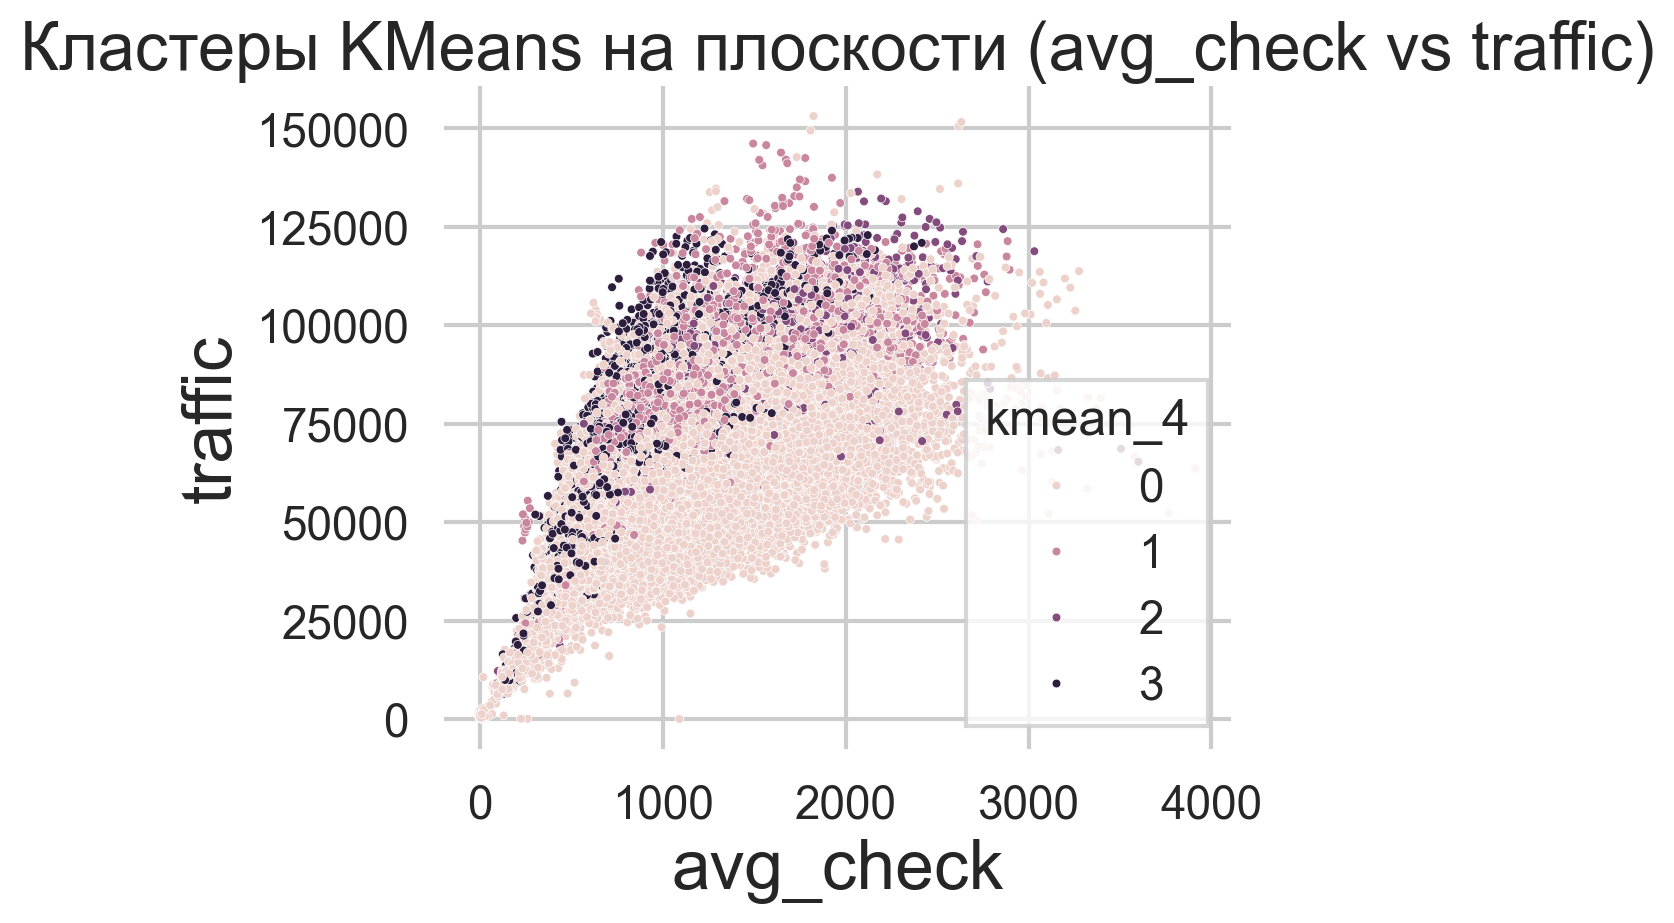

In [9]:

sns.scatterplot(
    data=df,
    x='avg_check',
    y='traffic',
    hue='kmean_4',
    # palette='tab10',
    s=10
)
plt.title('Кластеры KMeans на плоскости (avg_check vs traffic)')
plt.tight_layout()


<Axes: xlabel='avg_check', ylabel='Count'>

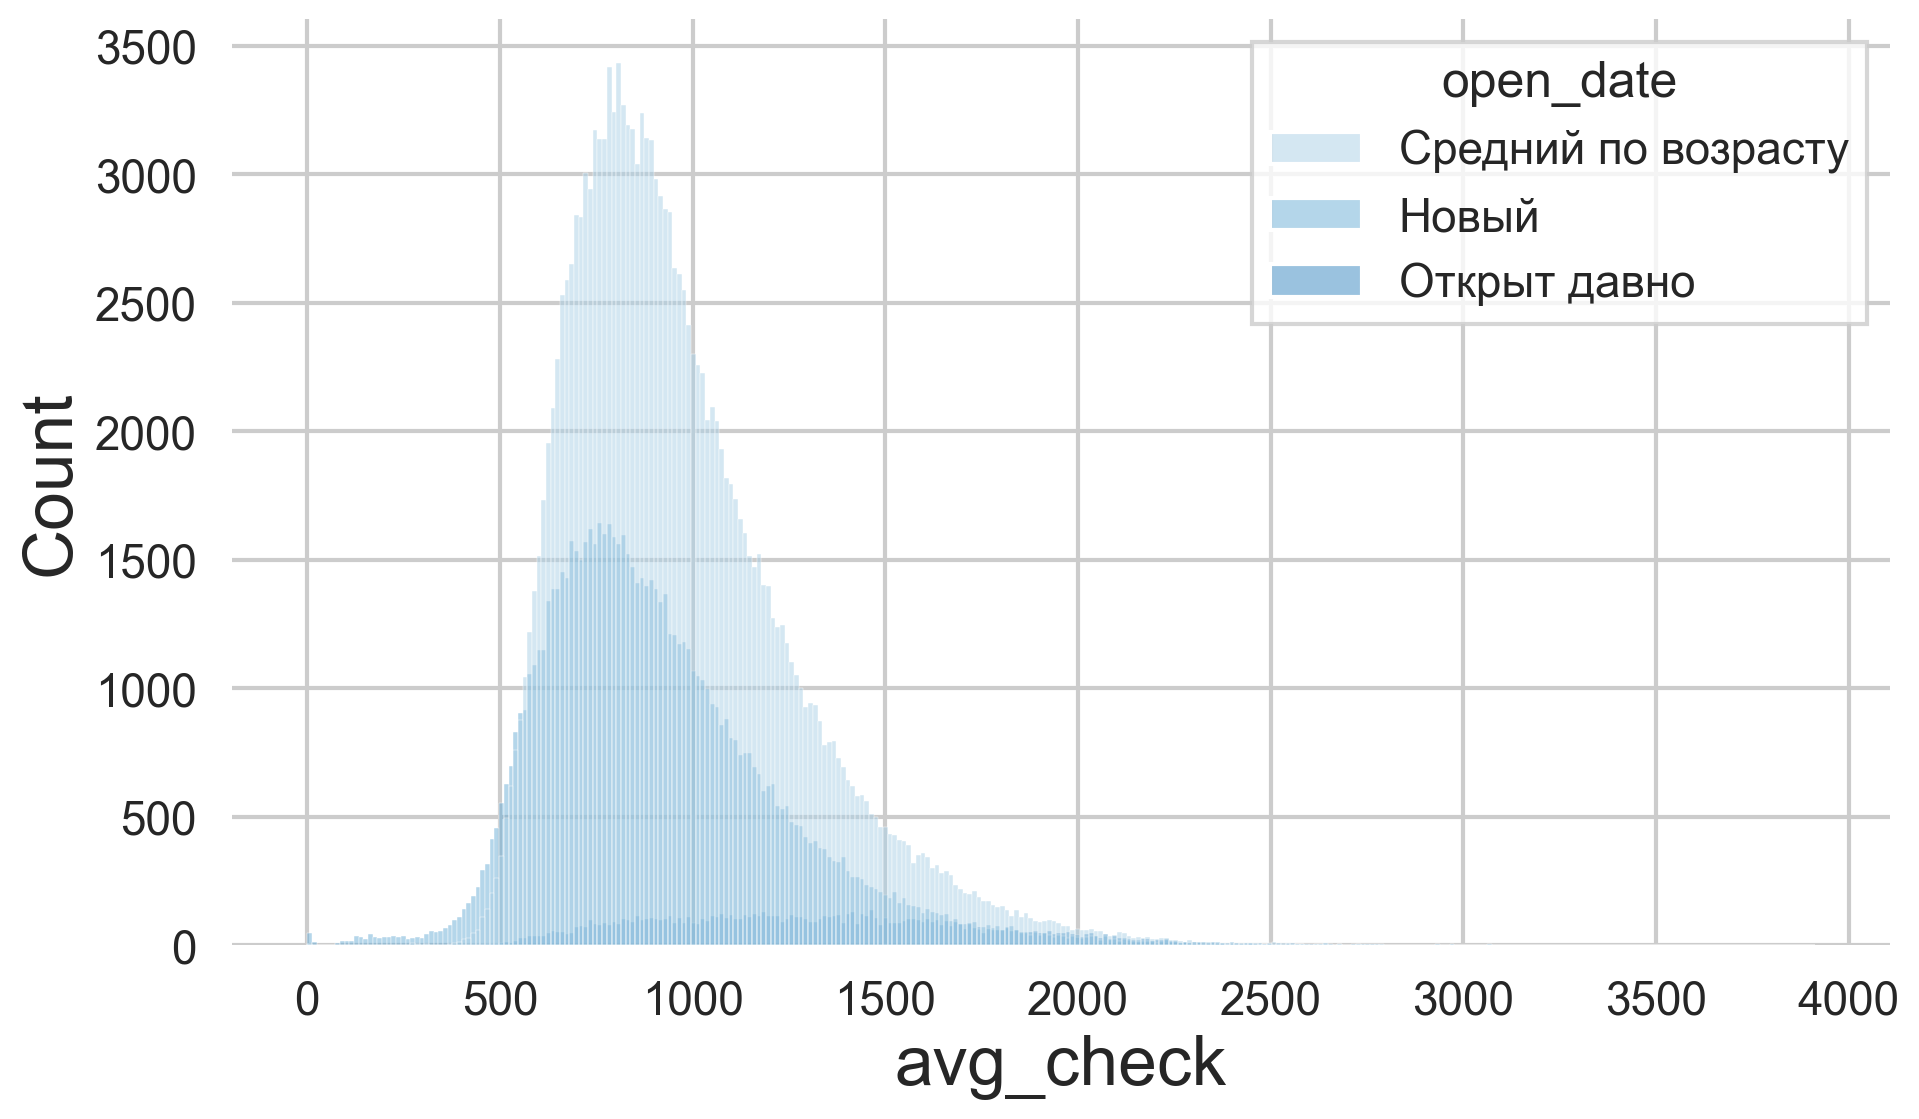

In [15]:
sns.histplot(data=df, x="avg_check", hue="open_date")

area
Большой          1278.806741
Маленький         838.782637
Очень большой    1677.709004
Средний           991.542678
Name: avg_check, dtype: float64

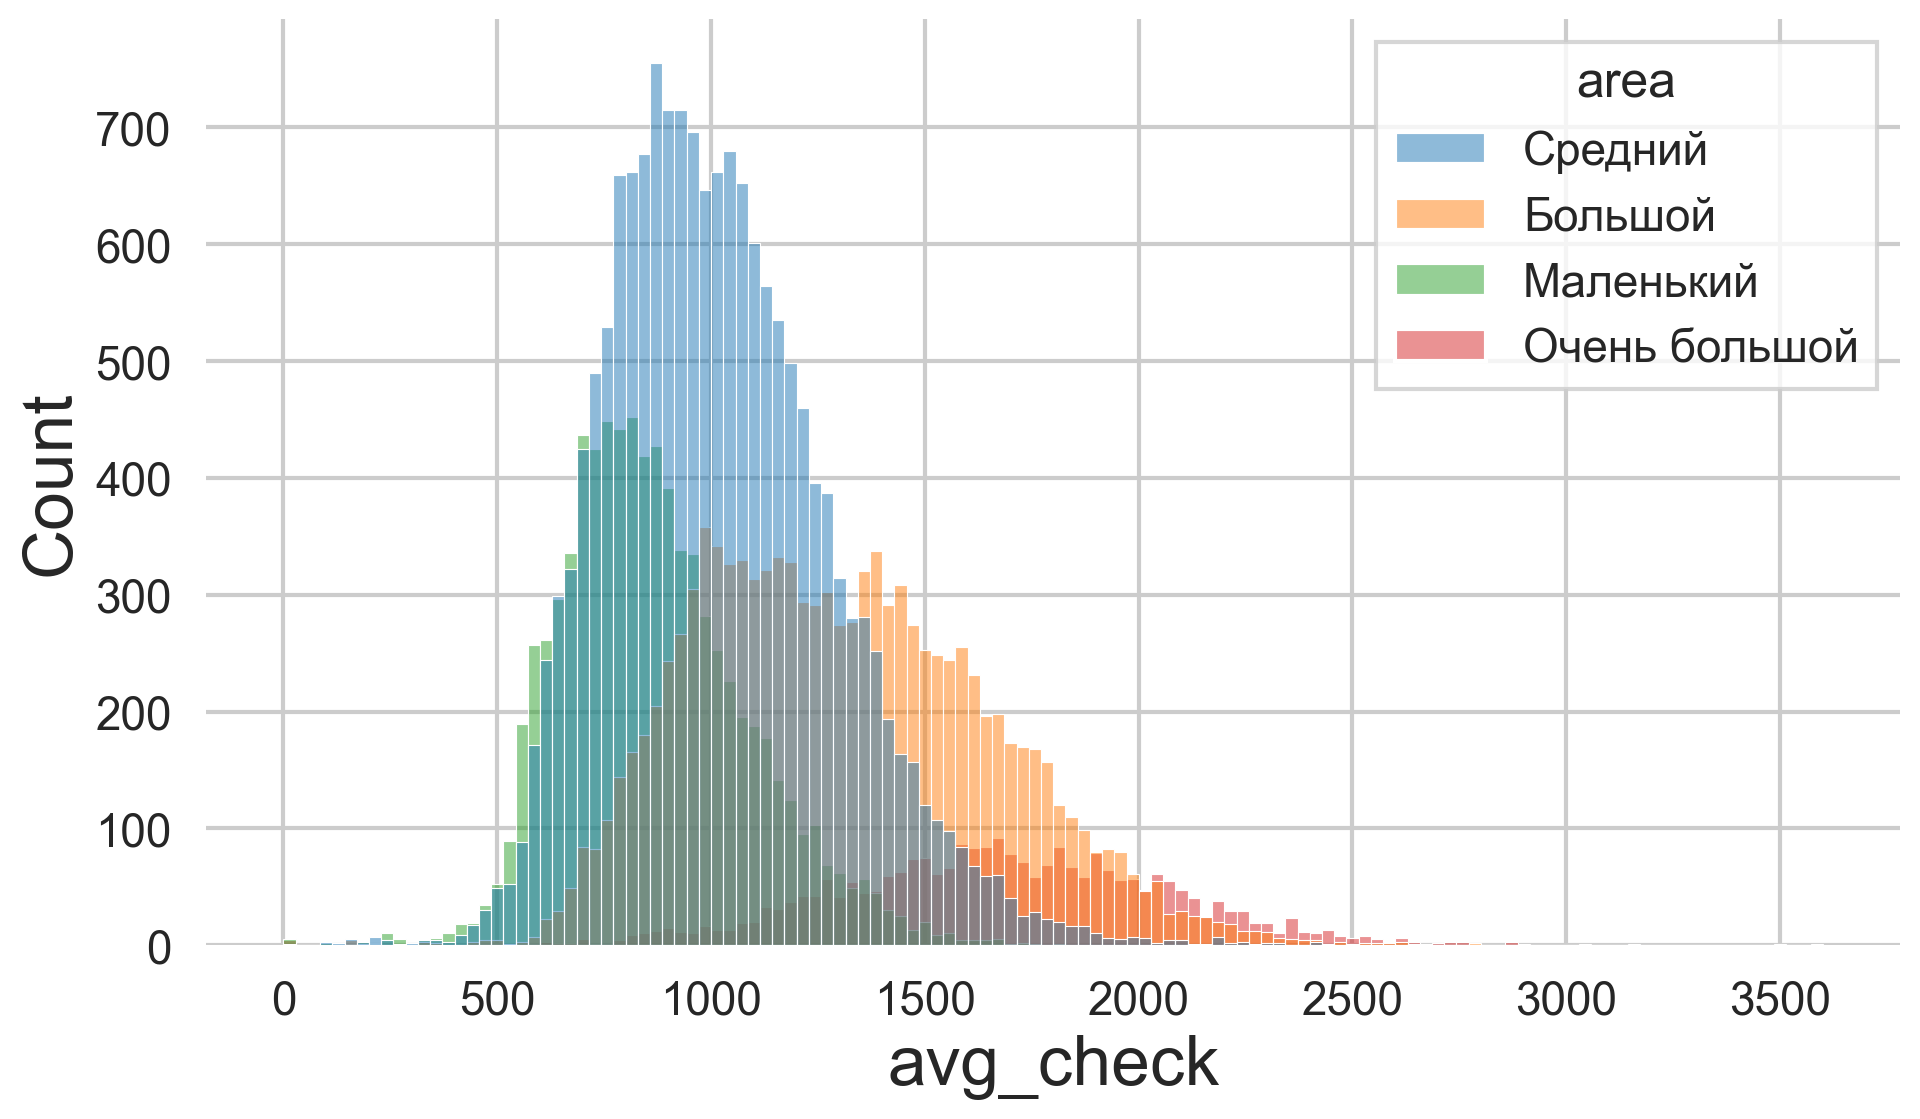

In [ ]:
sns.histplot(data=df[df['population'] > df['population'].mean()], x="avg_check", hue="area", palette="tab10")
df[df['population'] > df['population'].mean()].groupby('area')['avg_check'].median()


area
Большой          1078.196273
Маленький         762.392126
Очень большой    1410.396408
Средний           870.832568
Name: avg_check, dtype: float64

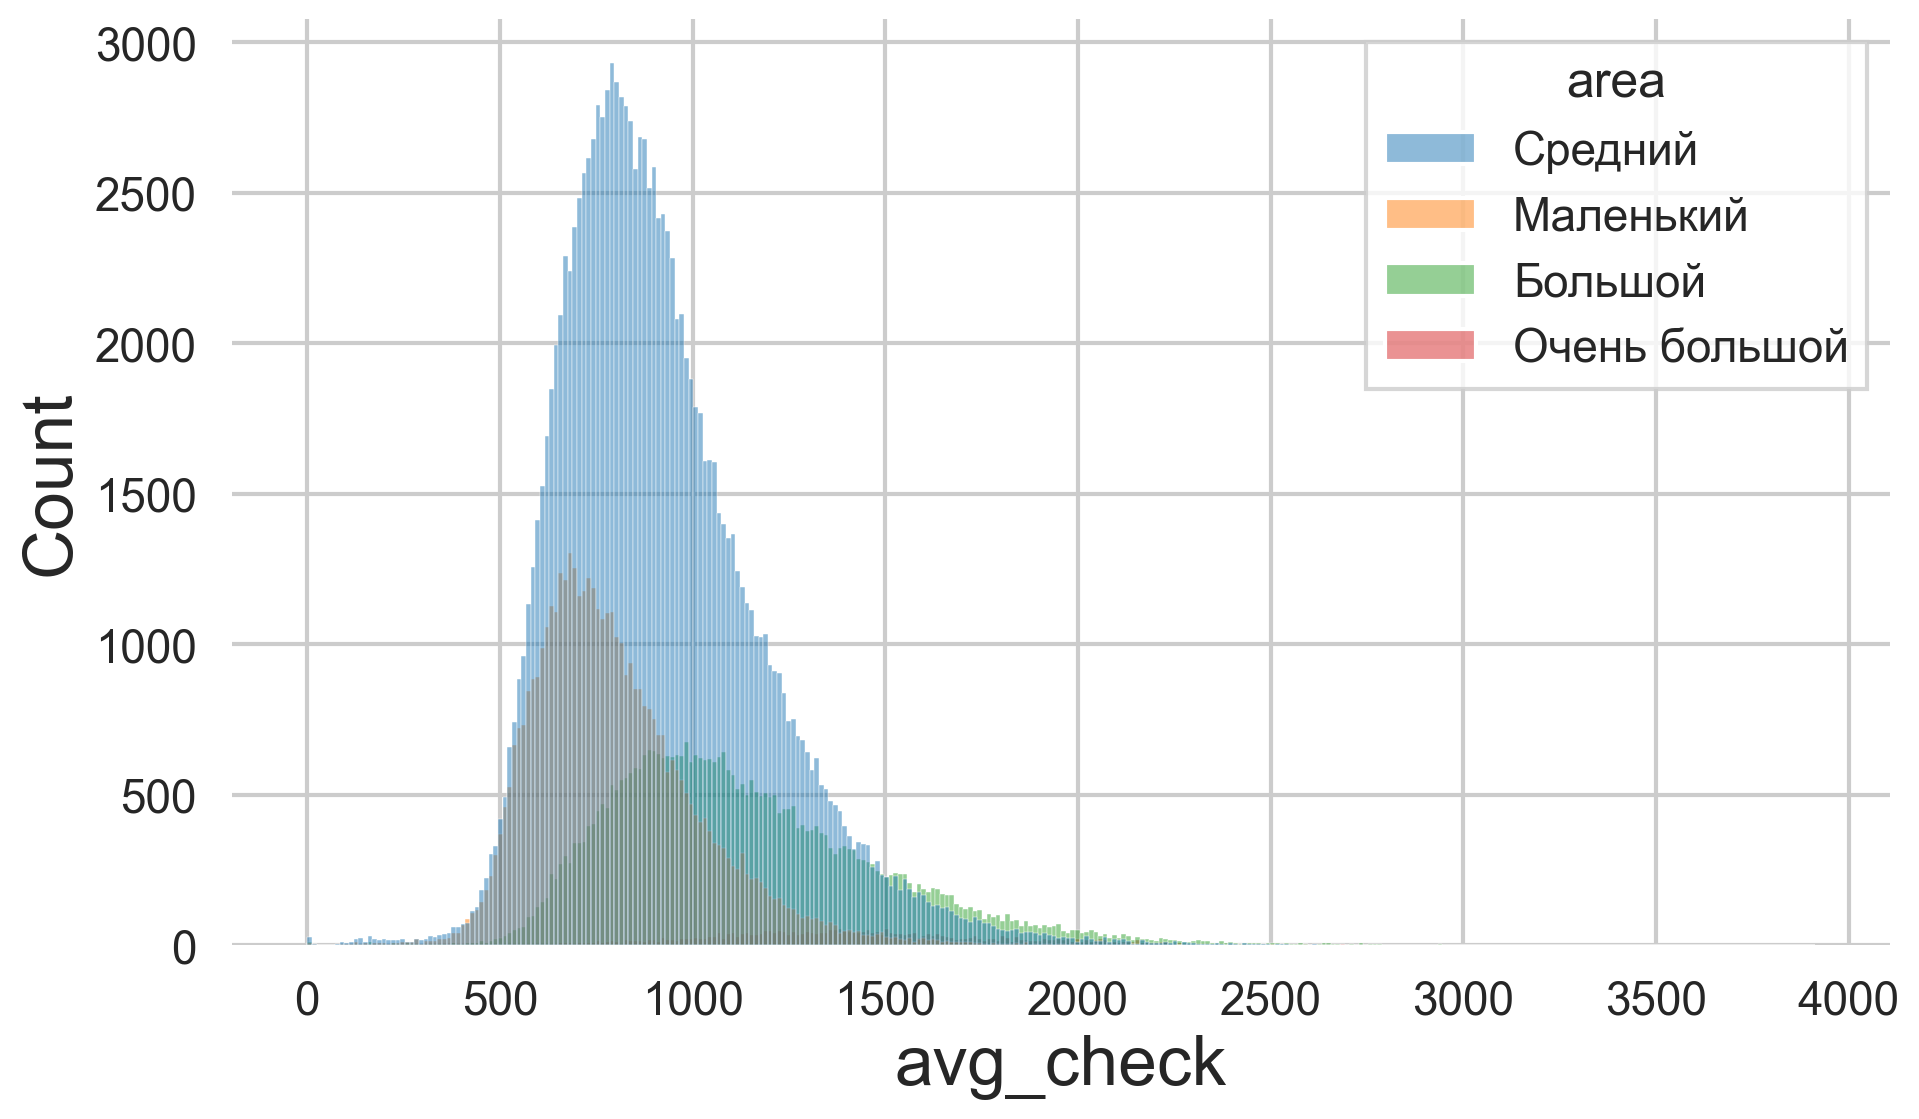

In [29]:
sns.histplot(data=df[df['population'] <= df['population'].mean()], x="avg_check", hue="area", palette="tab10")
df[df['population'] <= df['population'].mean()].groupby('area')['avg_check'].median()

In [33]:
df1 = pd.read_csv(path1)
df1.rename(columns=cols, inplace=True)
df1.head()

Unnamed: 0  new_id  month  traffic   avg_check            open_date  \
0           0       0     10    59662  823.060390  Средний по возрасту   
1           1       0      5    56674  859.361975  Средний по возрасту   
2           2       0      1    51488  763.937766  Средний по возрасту   
3           3       0      6    56693  836.362309  Средний по возрасту   
4           4       0      7    58128  845.257709  Средний по возрасту   

      area          locality              region  population  households  \
0  Средний  Кавказская ст-ца  Краснодарский край       10177         608   
1  Средний  Кавказская ст-ца  Краснодарский край       10177         608   
2  Средний  Кавказская ст-ца  Краснодарский край       10177         608   
3  Средний  Кавказская ст-ца  Краснодарский край       10177         608   
4  Средний  Кавказская ст-ца  Краснодарский край       10177         608   

   ped_traffic  auto_traffic  marketplaces  medical  schools  stops  shops  \
0         76.9    200.333333             0        6        0      0      2   
1         76.9    200.333333             0        6        0      0      2   
2         76.9    200.333333             0        6        0      0      2   
3         76.9    200.333333             0        6        0      0      2   
4         76.9    200.333333             0        6        0      0      2   

   pyaterochki_near  Индекс_РИА_2024  Количество конкурентов (500 м)  \
0                 0            76.58                               2   
1                 0            76.58                               2   
2                 0            76.58                               2   
3                 0            76.58                               2   
4                 0            76.58                               2   

   Общий трафик, в час  Примерная месячная выручка  \
0           277.233333                4.910543e+07   
1           277.233333                4.870348e+07   
2           277.233333                3.933363e+07   
3           277.233333                4.741589e+07   
4           277.233333                4.913314e+07   

   Индекс инфраструктуры (100-300 м)  
0                                  6  
1                                  6  
2                                  6  
3                                  6  
4                                  6

area
Большой          1354.598099
Маленький         868.146065
Очень большой    1704.104304
Средний          1034.000496
Name: avg_check, dtype: float64


area
Большой          1073.119579
Маленький         760.848965
Очень большой    1398.553840
Средний           869.647130
Name: avg_check, dtype: float64

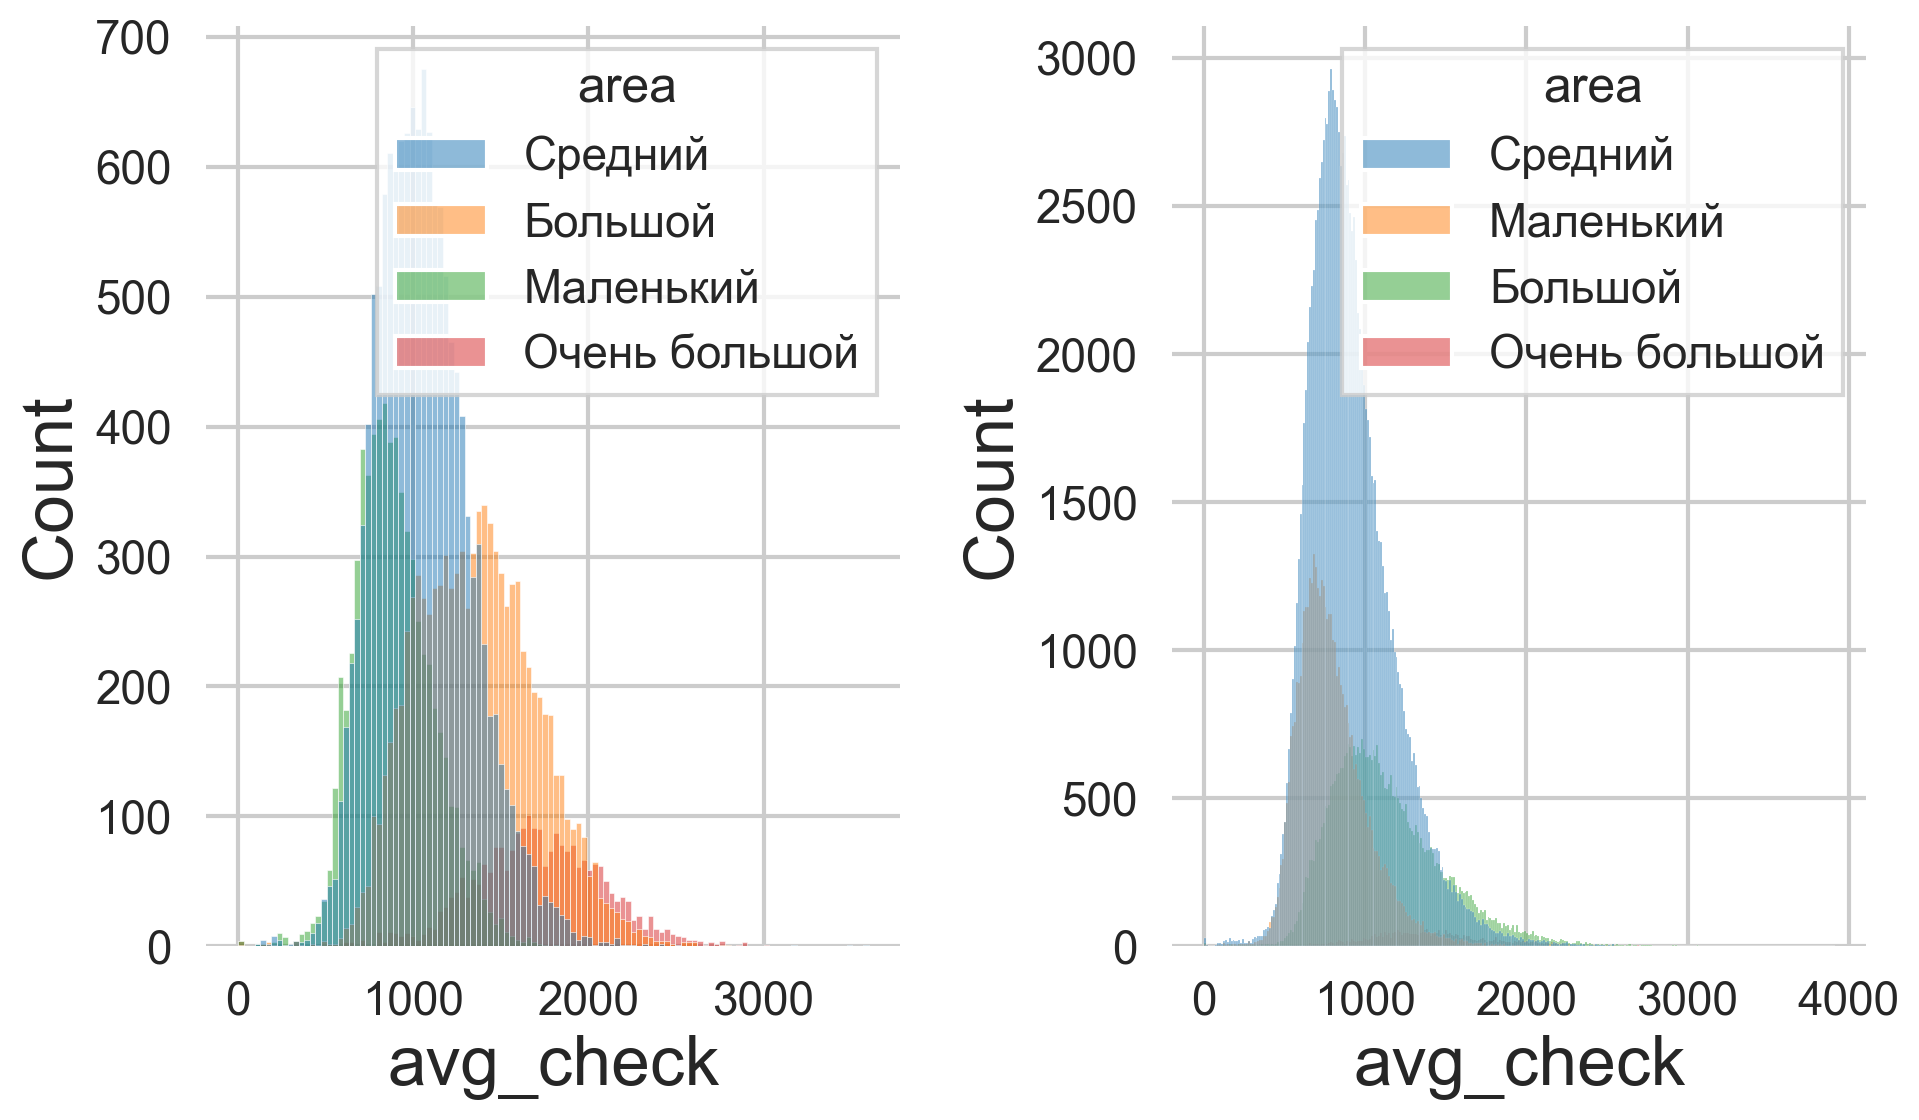

In [37]:
plt.subplot(1, 2, 1)
sns.histplot(data=df1[df1['population'] > df1['population'].mean()], x="avg_check", hue="area", palette="tab10")
print(df1[df1['population'] > df1['population'].mean()].groupby('area')['avg_check'].median())
plt.subplot(1, 2, 2)
sns.histplot(data=df1[df1['population'] <= df1['population'].mean()], x="avg_check", hue="area", palette="tab10")
df1[df1['population'] <= df1['population'].mean()].groupby('area')['avg_check'].median()


area
Большой          1208.564787
Маленький         804.666016
Очень большой    1624.420898
Средний           914.104950
Name: avg_check, dtype: float64


area
Большой          1016.011223
Маленький         740.824893
Очень большой    1277.963071
Средний           856.605830
Name: avg_check, dtype: float64

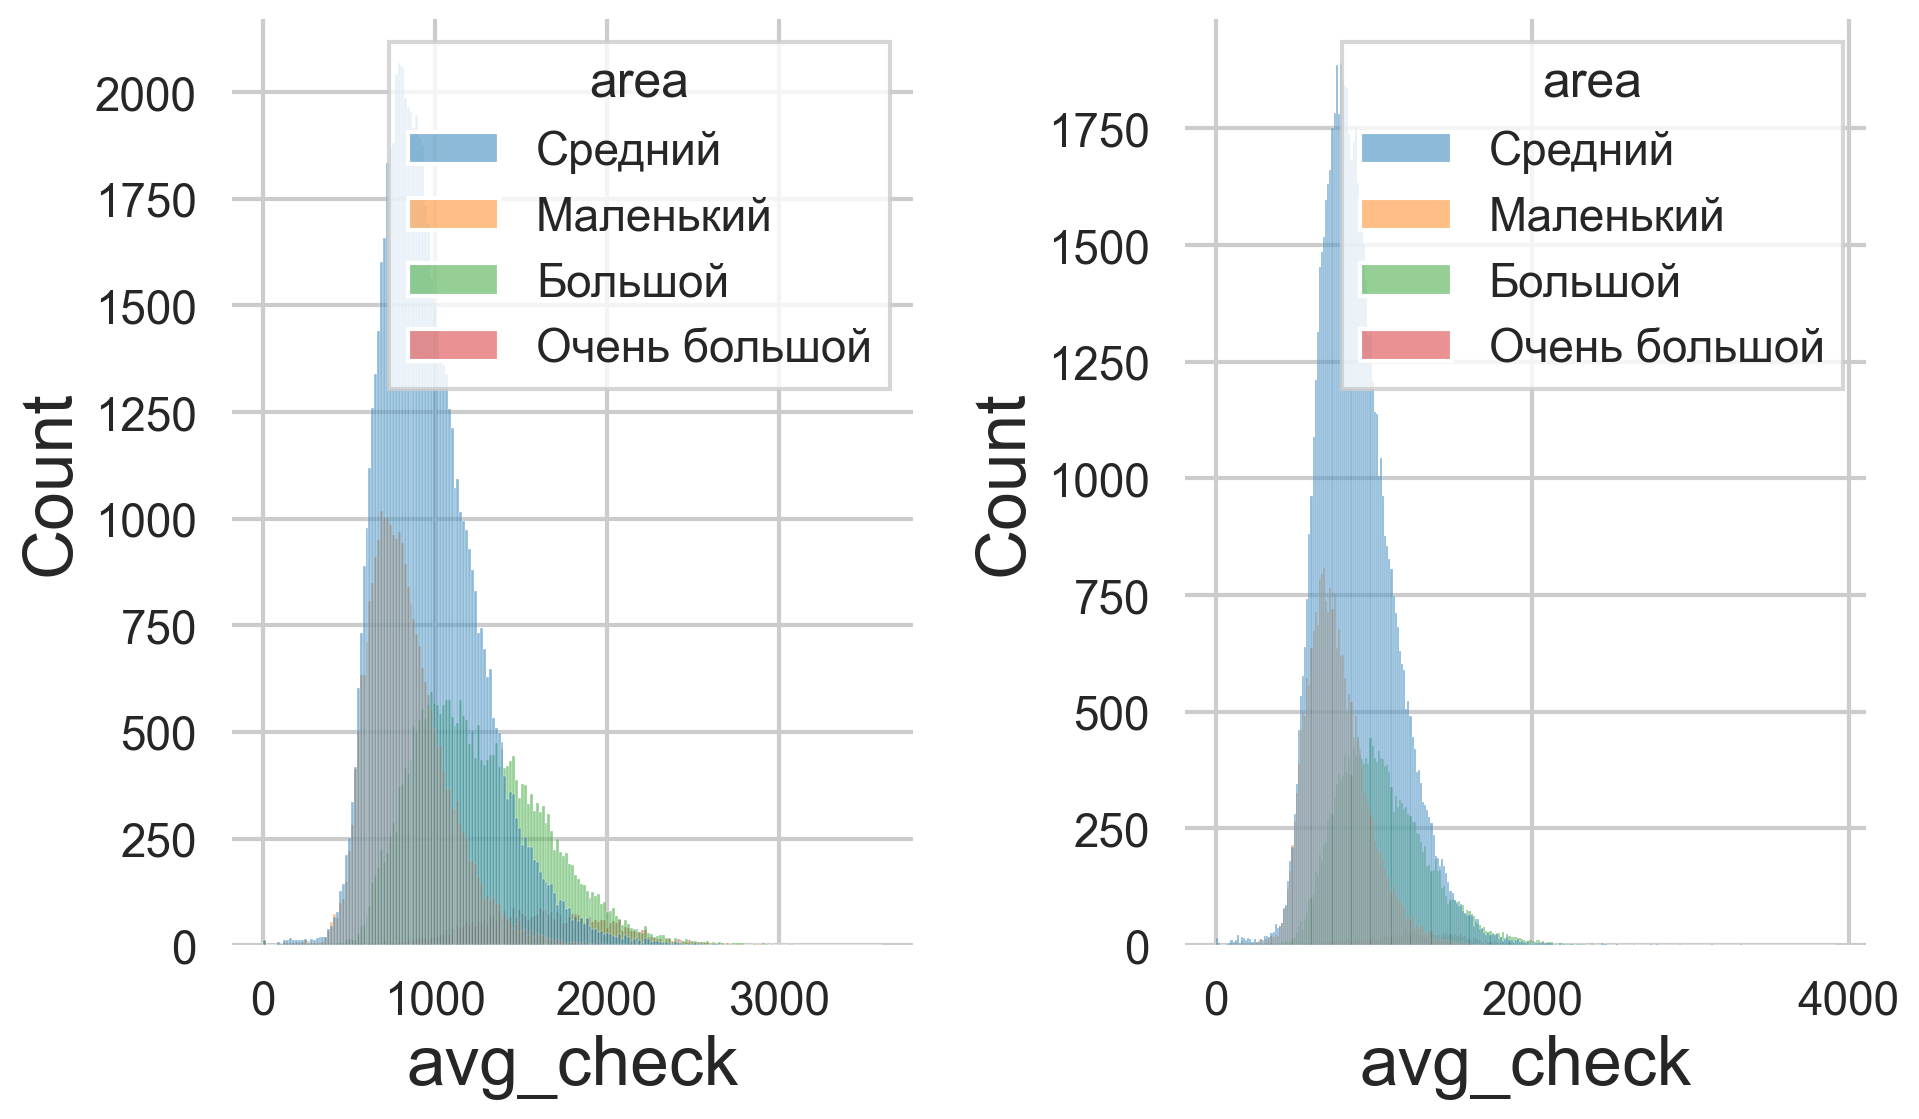

In [38]:
plt.subplot(1, 2, 1)
sns.histplot(data=df1[df1['Индекс_РИА_2024'] > df1['Индекс_РИА_2024'].mean()], x="avg_check", hue="area", palette="tab10")
print(df1[df1['Индекс_РИА_2024'] > df1['Индекс_РИА_2024'].mean()].groupby('area')['avg_check'].median())
plt.subplot(1, 2, 2)
sns.histplot(data=df1[df1['Индекс_РИА_2024'] <= df1['Индекс_РИА_2024'].mean()], x="avg_check", hue="area", palette="tab10")
df1[df1['Индекс_РИА_2024'] <= df1['Индекс_РИА_2024'].mean()].groupby('area')['avg_check'].median()

open_date
Новый                  4.901759e+07
Открыт давно           1.019954e+08
Средний по возрасту    5.526876e+07
Name: Примерная месячная выручка, dtype: float64


open_date
Новый                  4.530290e+07
Открыт давно           6.913843e+07
Средний по возрасту    4.842204e+07
Name: Примерная месячная выручка, dtype: float64

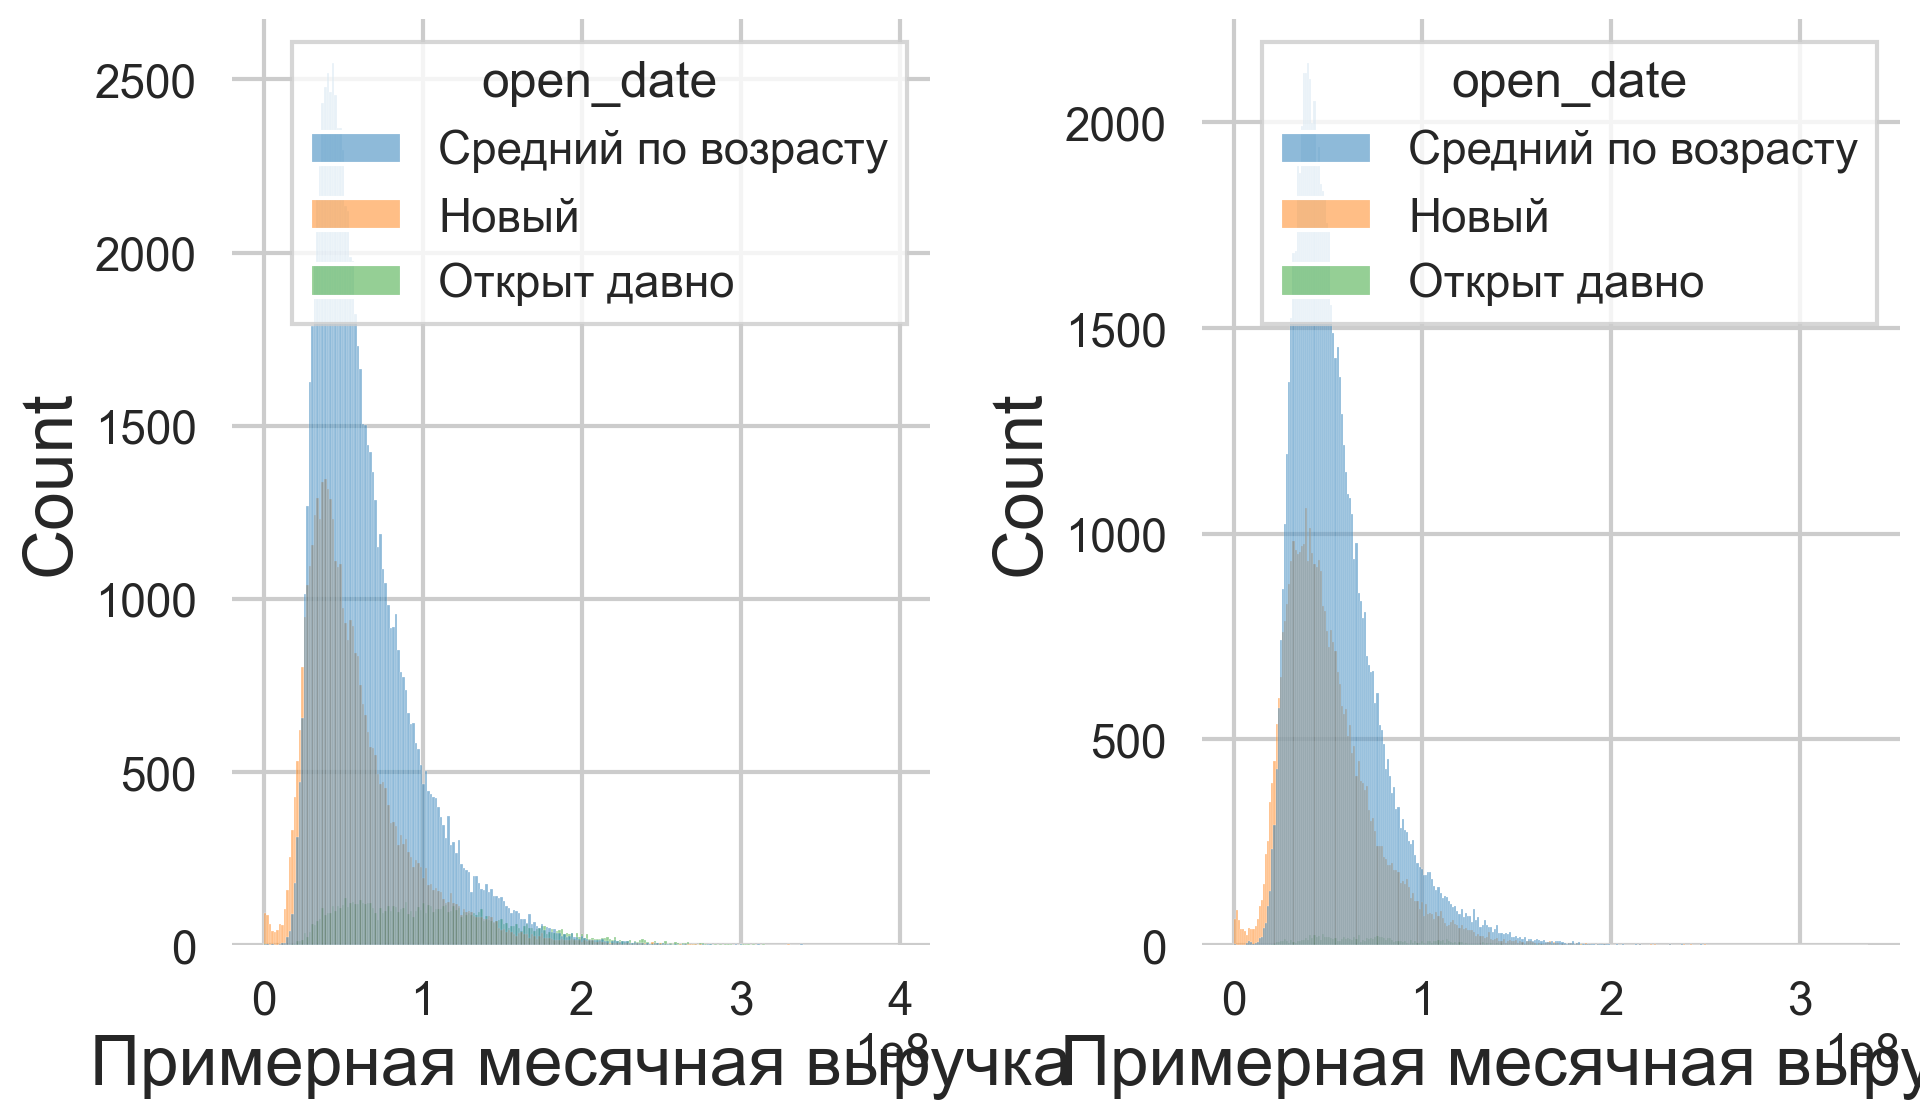

In [41]:
plt.subplot(1, 2, 1)
sns.histplot(data=df1[df1['Индекс_РИА_2024'] > df1['Индекс_РИА_2024'].mean()], x="Примерная месячная выручка", hue="open_date", palette="tab10")
print(df1[df1['Индекс_РИА_2024'] > df1['Индекс_РИА_2024'].mean()].groupby('open_date')['Примерная месячная выручка'].median())
plt.subplot(1, 2, 2)
sns.histplot(data=df1[df1['Индекс_РИА_2024'] <= df1['Индекс_РИА_2024'].mean()], x="Примерная месячная выручка", hue="open_date", palette="tab10")
df1[df1['Индекс_РИА_2024'] <= df1['Индекс_РИА_2024'].mean()].groupby('open_date')['Примерная месячная выручка'].median()

schools
0    64739.0
1    69151.0
2    70099.5
3    71801.0
4    69132.0
5    79182.0
8    87685.5
Name: traffic, dtype: float64
schools
0    54713.0
1    57380.0
2    59211.5
3    59463.5
4    59143.0
5    64423.0
6    76750.5
Name: traffic, dtype: float64


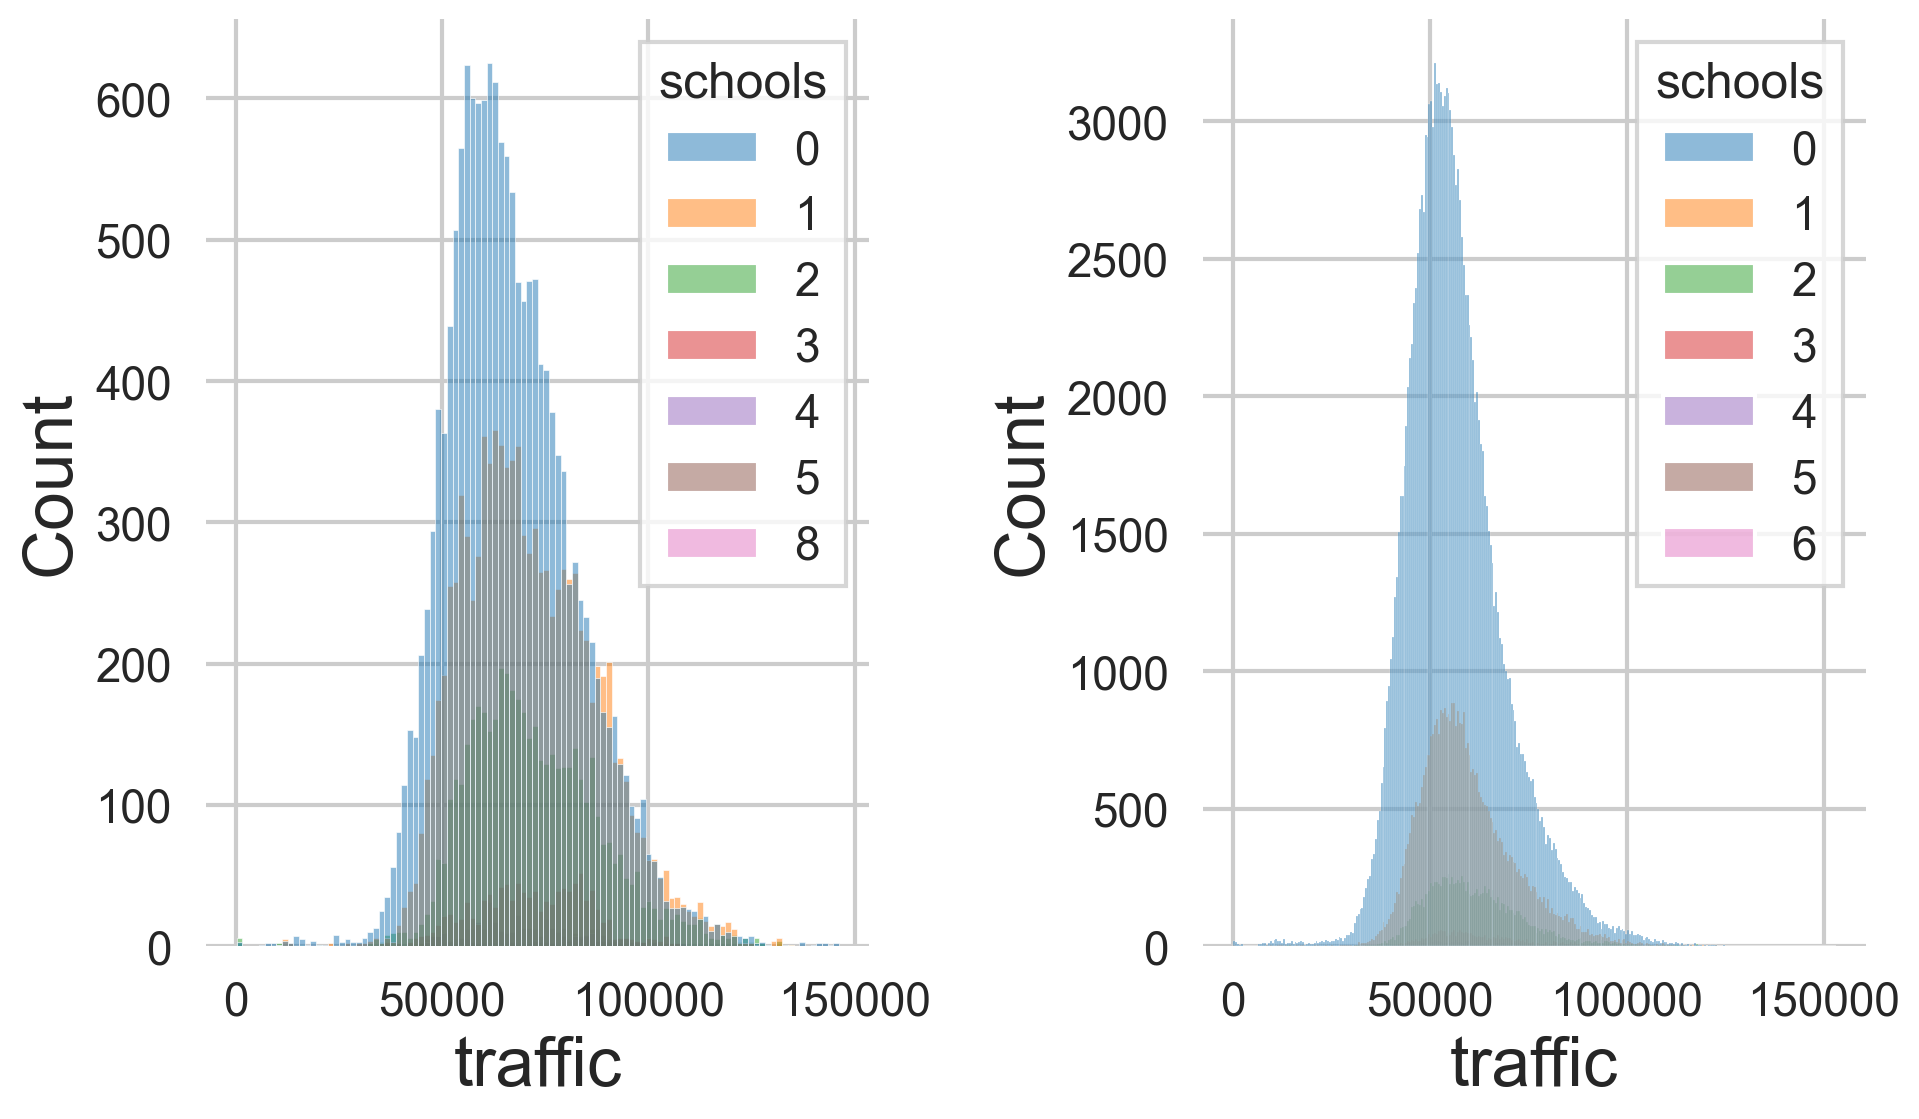

In [47]:
plt.subplot(1, 2, 1)
sns.histplot(data=df1[df1['population'] > df1['population'].mean()], x="traffic", hue="schools", palette="tab10")
print(df1[df1['population'] > df1['population'].mean()].groupby('schools')['traffic'].median())
plt.subplot(1, 2, 2)
sns.histplot(data=df1[df1['population'] <= df1['population'].mean()], x="traffic", hue="schools", palette="tab10")
print(df1[df1['population'] <= df1['population'].mean()].groupby('schools')['traffic'].median())


schools
0    1045.909918
1    1152.256057
2    1142.518929
3    1129.173585
4    1136.503713
5    1333.943845
8    1817.082663
Name: avg_check, dtype: float64


schools
0    891.521384
1    859.702534
2    829.884364
3    813.666593
4    781.195302
5    801.875494
6    970.895737
Name: avg_check, dtype: float64

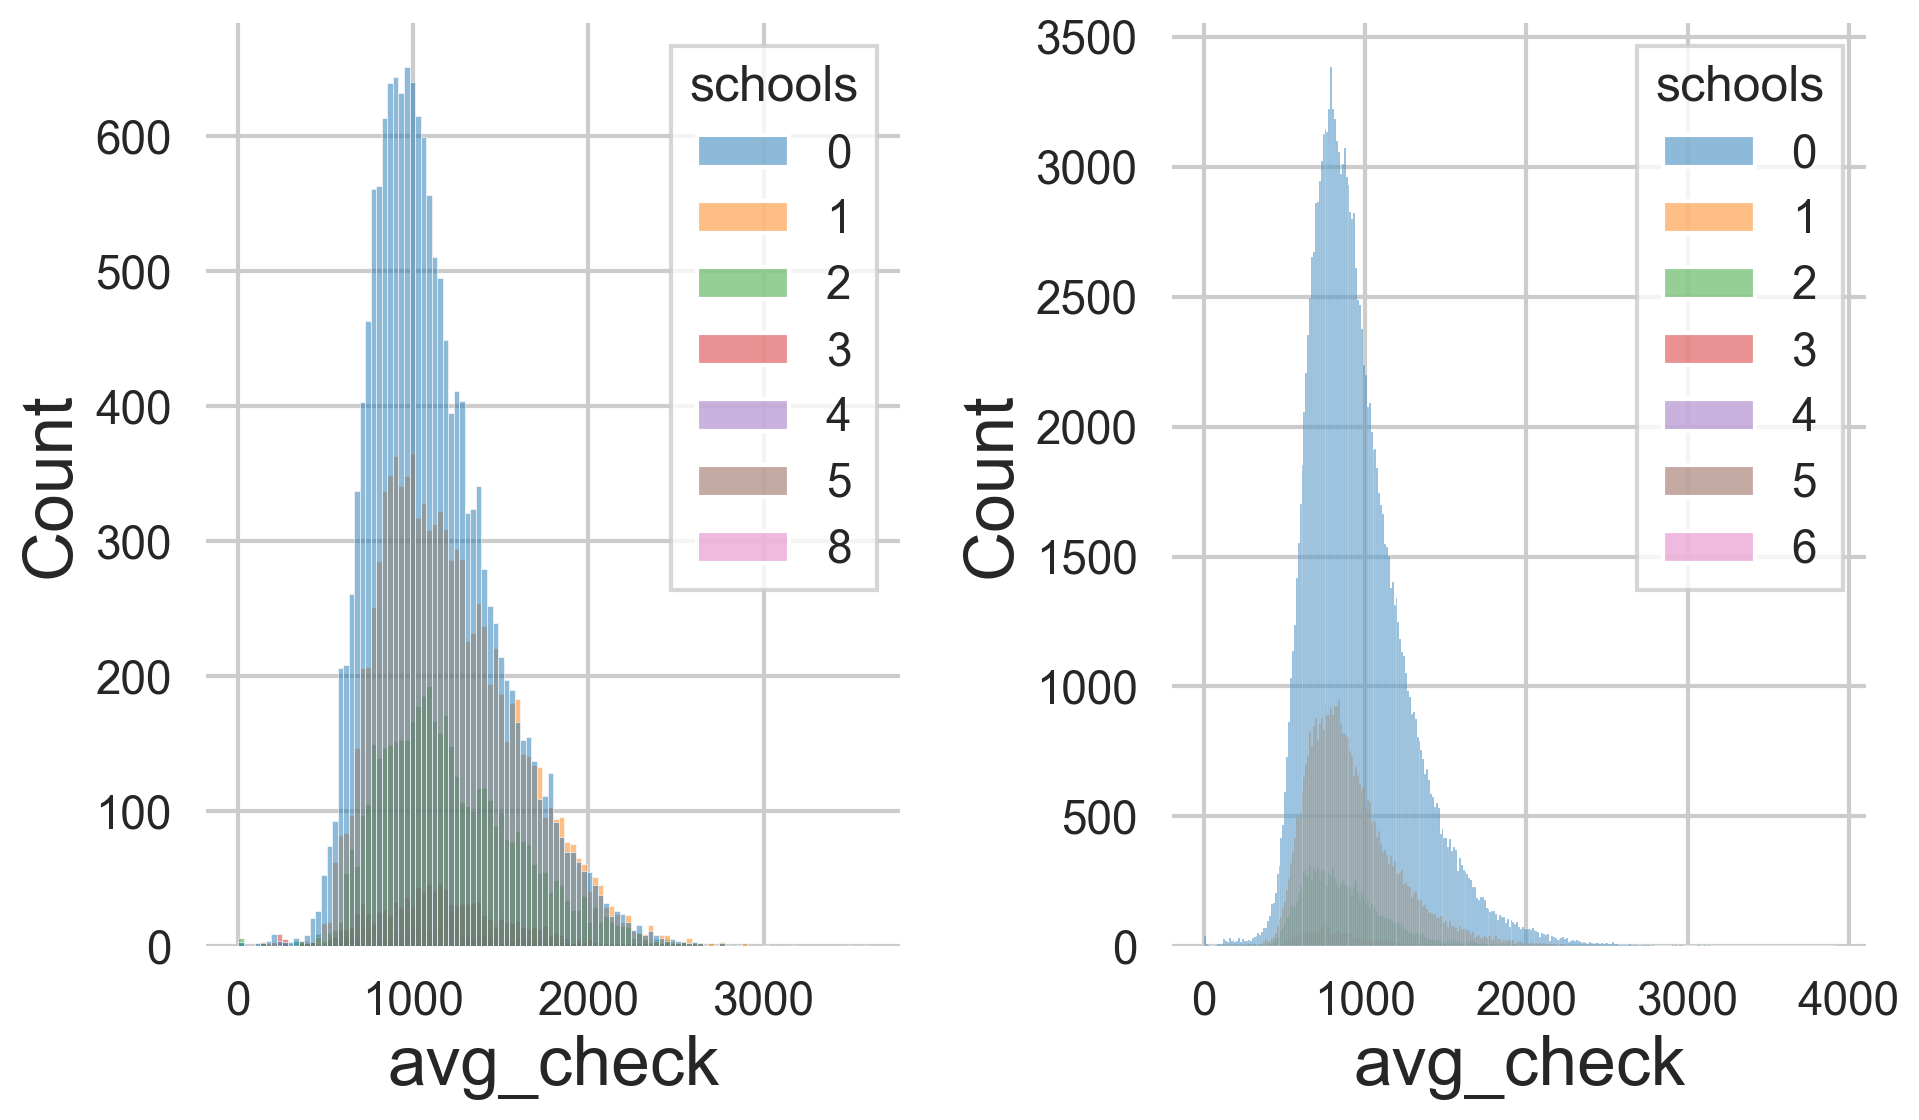

In [48]:
plt.subplot(1, 2, 1)
sns.histplot(data=df1[df1['population'] > df1['population'].mean()], x="avg_check", hue="schools", palette="tab10")
print(df1[df1['population'] > df1['population'].mean()].groupby('schools')['avg_check'].median())
plt.subplot(1, 2, 2)
sns.histplot(data=df1[df1['population'] <= df1['population'].mean()], x="avg_check", hue="schools", palette="tab10")
df1[df1['population'] <= df1['population'].mean()].groupby('schools')['avg_check'].median()

In [51]:


# проверка имён
assert 'shops' in df.columns, "нет колонки 'shops'"
assert 'traffic' in df.columns, "нет колонки 'traffic'"

age_col = 'open_date'

# Сделаем бинарную переменную: считают 'новыми' те, у кого категория содержит 'недавно' (учти регистр)
df['is_new'] = df[age_col] == 'Новый'
# проверим распределение
print(df['is_new'].value_counts())


is_new
False    172050
True      84673
Name: count, dtype: int64


C:\Users\Daria\AppData\Local\Temp\ipykernel_3224\25812737.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Daria\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


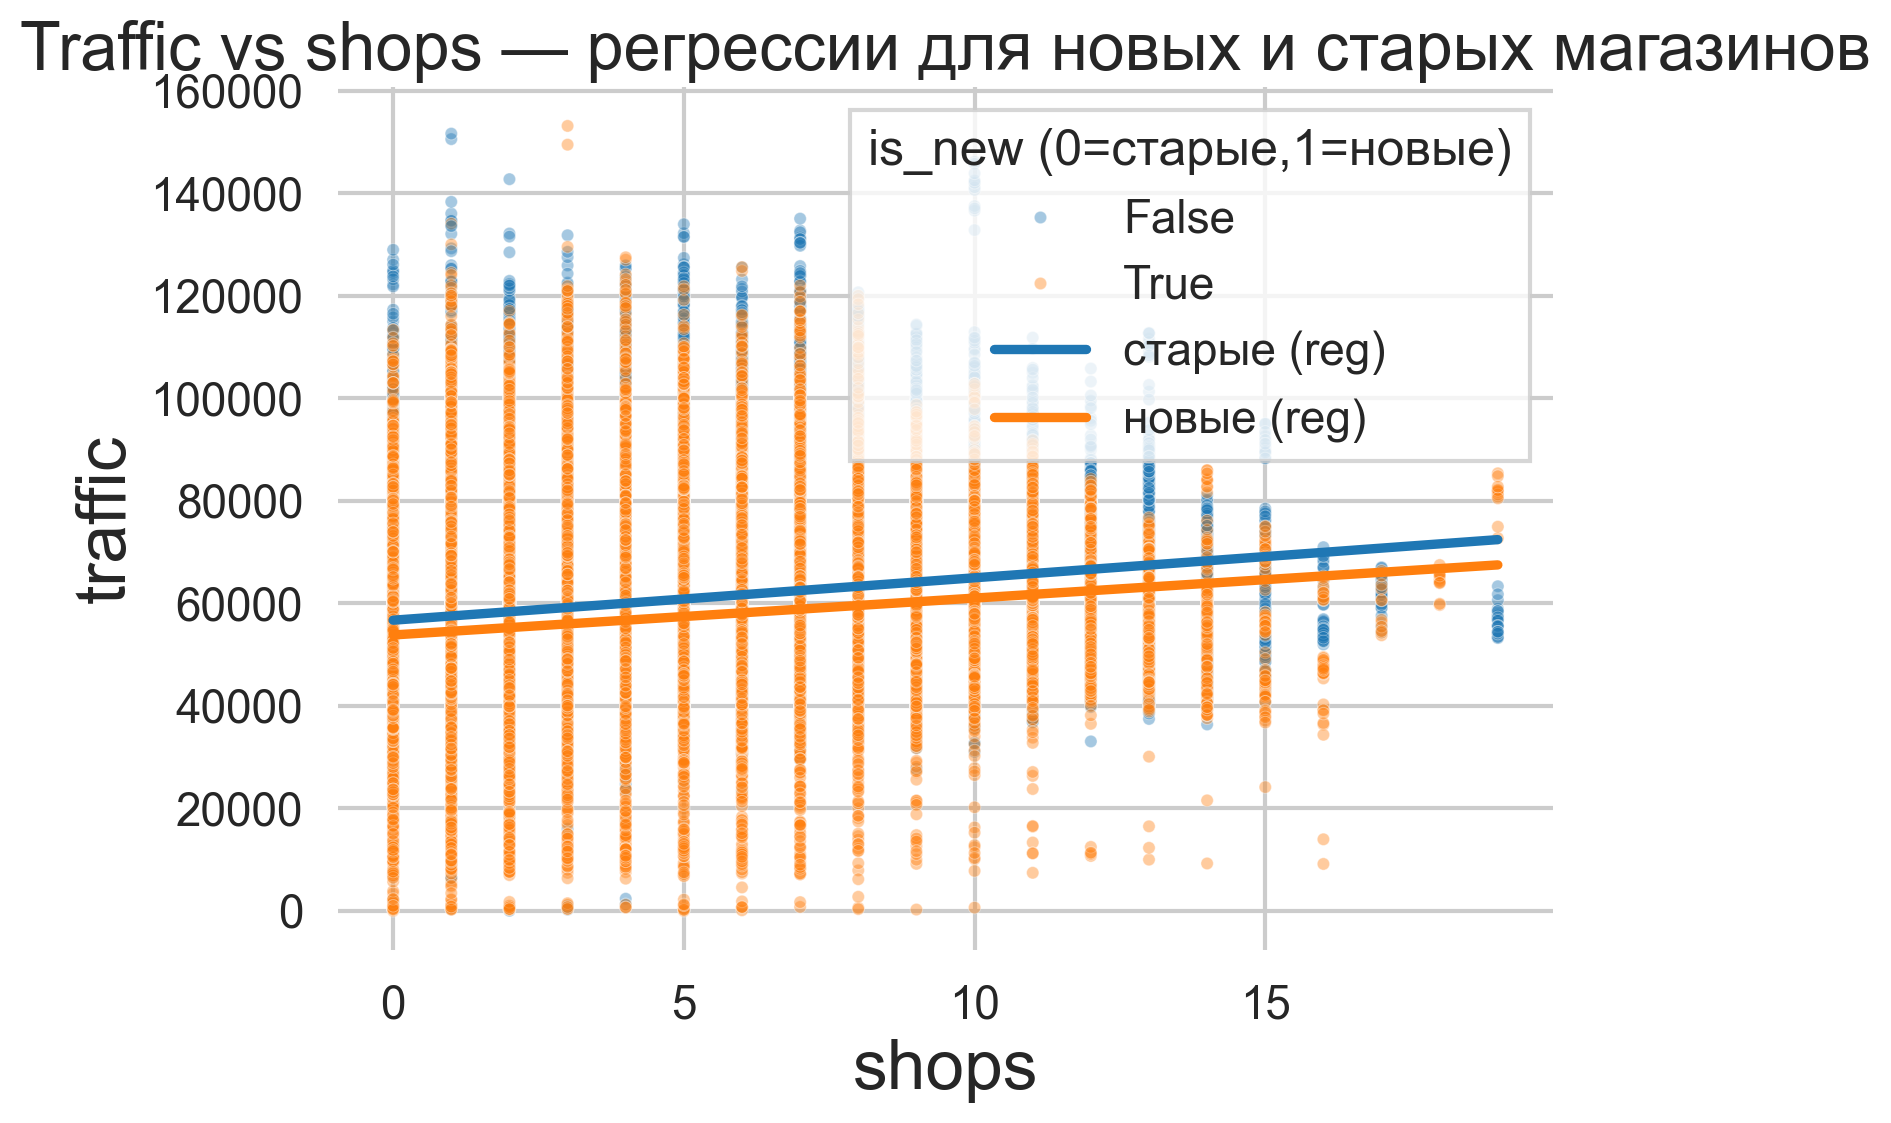

In [52]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='shops', y='traffic', hue='is_new', alpha=0.4, s=20, palette=['tab:blue','tab:orange'])
# добавить линейные линии по группам
sns.regplot(data=df[df['is_new']==0], x='shops', y='traffic', scatter=False, label='старые (reg)', color='tab:blue')
sns.regplot(data=df[df['is_new']==1], x='shops', y='traffic', scatter=False, label='новые (reg)', color='tab:orange')
plt.legend(title='is_new (0=старые,1=новые)')
plt.title('Traffic vs shops — регрессии для новых и старых магазинов')
plt.tight_layout()
plt.show()


In [54]:
import statsmodels.formula.api as smf

# подвыборки
df_old = df[df['is_new']==0].copy()
df_new = df[df['is_new']==1].copy()

m_old = smf.ols('traffic ~ shops', data=df_old).fit(cov_type='HC3')
m_new = smf.ols('traffic ~ shops', data=df_new).fit(cov_type='HC3')

print("OLD model (shops -> traffic):")
print(m_old.summary().tables[1])
print("\nNEW model (shops -> traffic):")
print(m_new.summary().tables[1])


OLD model (shops -> traffic):
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.67e+04     49.169   1153.183      0.000    5.66e+04    5.68e+04
shops        827.1404     10.228     80.872      0.000     807.094     847.186

NEW model (shops -> traffic):
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.382e+04     68.338    787.577      0.000    5.37e+04     5.4e+04
shops        719.2145     14.585     49.311      0.000     690.628     747.801


In [55]:
import numpy as np
from scipy import stats

b_old = m_old.params['shops']; se_old = m_old.bse['shops']
b_new = m_new.params['shops']; se_new = m_new.bse['shops']

diff = b_new - b_old
se_diff = np.sqrt(se_new**2 + se_old**2)
z = diff / se_diff
p_two = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"b_new = {b_new:.3f}, se_new = {se_new:.3f}")
print(f"b_old = {b_old:.3f}, se_old = {se_old:.3f}")
print(f"diff = b_new - b_old = {diff:.3f}")
print(f"z = {z:.3f}, p-value (two-sided) = {p_two:.3e}")


b_new = 719.214, se_new = 14.585
b_old = 827.140, se_old = 10.228
diff = b_new - b_old = -107.926
z = -6.058, p-value (two-sided) = 1.374e-09


In [56]:
formula = 'traffic ~ shops + is_new + shops:is_new'
m_inter = smf.ols(formula, data=df).fit(cov_type='HC3')
print(m_inter.summary().tables[1])


                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              5.67e+04     49.169   1153.183      0.000    5.66e+04    5.68e+04
is_new[T.True]       -2879.4893     84.189    -34.203      0.000   -3044.496   -2714.483
shops                  827.1404     10.228     80.872      0.000     807.094     847.186
shops:is_new[T.True]  -107.9260     17.814     -6.058      0.000    -142.841     -73.011


In [19]:
dfx = df[["traffic", "ped_traffic", "auto_traffic"]]
dfx = dfx[(dfx["traffic"] != 0)]
alltr = dfx["traffic"].sum()
alltr_pech = dfx["ped_traffic"].sum() * 30 * 8
alltr_auto = dfx["auto_traffic"].sum() * 30 * 8
print((alltr - alltr_pech) / alltr_auto)

0.5681172081073115


In [9]:
dfx[df['auto_traffic'] == 0]

traffic  ped_traffic  auto_traffic
360       73443          0.0           0.0
361       75858          0.0           0.0
362       57067          0.0           0.0
363       60297          0.0           0.0
364       65214          0.0           0.0
...         ...          ...           ...
256627    35766         34.0           0.0
256628    36518         34.0           0.0
256629    21174         34.0           0.0
256630    33949         34.0           0.0
256631    35477         34.0           0.0

[10405 rows x 3 columns]

In [1]:
import pandas as pd
from pathlib import Path

input_path = Path("Х5_with_region_index_2024_population_patched_with_flags.xlsx")

df = pd.read_excel(input_path)
print("Размер исходного датафрейма:", df.shape)
df.head()

Размер исходного датафрейма: (256711, 21)


new_id  Месяц  Трафик  Средний чек Дата открытия, категориальный  \
0       0     10   59662   976.170936           Средний по возрасту   
1       0      5   56674  1025.462154           Средний по возрасту   
2       0      1   51488  1158.150890           Средний по возрасту   
3    3594      7   68039  1119.028697           Средний по возрасту   
4    3594      6   64878  1112.584778           Средний по возрасту   

  Торговая площадь, категориальный                       Населенный пункт  \
0                          Средний                               Абинск г   
1                          Средний                               Абинск г   
2                          Средний                               Абинск г   
3                          Средний  1-го отделения совхоза "Масловский" п   
4                          Средний  1-го отделения совхоза "Масловский" п   

               Регион  Численность населения  Количество домохозяйств  ...  \
0  Краснодарский край                  38231                      728  ...   
1  Краснодарский край                  38231                      728  ...   
2  Краснодарский край                  38231                      728  ...   
3     Воронежская обл                   3827                      768  ...   
4     Воронежская обл                   3827                      768  ...   

   Трафик авто, в час  Маркетплейсы, доставки, постаматы (100 м)  \
0               146.4                                          0   
1               146.4                                          0   
2               146.4                                          0   
3               406.0                                          5   
4               406.0                                          5   

   Медицинские уч. и аптеки (300 м)  Школы (300 м)  Остановки (300 м)  \
0                                 0              0                  0   
1                                 0              0                  0   
2                                 0              0                  0   
3                                 1              0                  0   
4                                 1              0                  0   

   Продуктовые магазины (500 м)  Пятерочки (500 м)  Индекс_РИА_2024  \
0                             0                  0            76.58   
1                             0                  0            76.58   
2                             0                  0            76.58   
3                             1                  0            61.98   
4                             1                  0            61.98   

   traffic_flag  is_season  
0             1          0  
1             1          0  
2             1          0  
3             1          1  
4             1          1  

[5 rows x 21 columns]

In [20]:
import seaborn as sns

dfi = df[['Регион', 'Индекс_РИА_2024']].groupby('Регион').agg('mean').reset_index()
dfi['Индекс_РИА_2024'] = dfi['Индекс_РИА_2024'].map(round)
dfi

Регион  Индекс_РИА_2024
0                                   Адыгея Респ               36
1                                    Алтай Респ               21
2                                Алтайский край               49
3                             Архангельская обл               39
4                              Астраханская обл               39
..                                          ...              ...
67  Ханты-Мансийский Автономный округ - Югра АО               80
68                              Челябинская обл               68
69               Чувашская Республика - Чувашия               42
70                            Ямало-Ненецкий АО               73
71                              Ярославская обл               50

[72 rows x 2 columns]

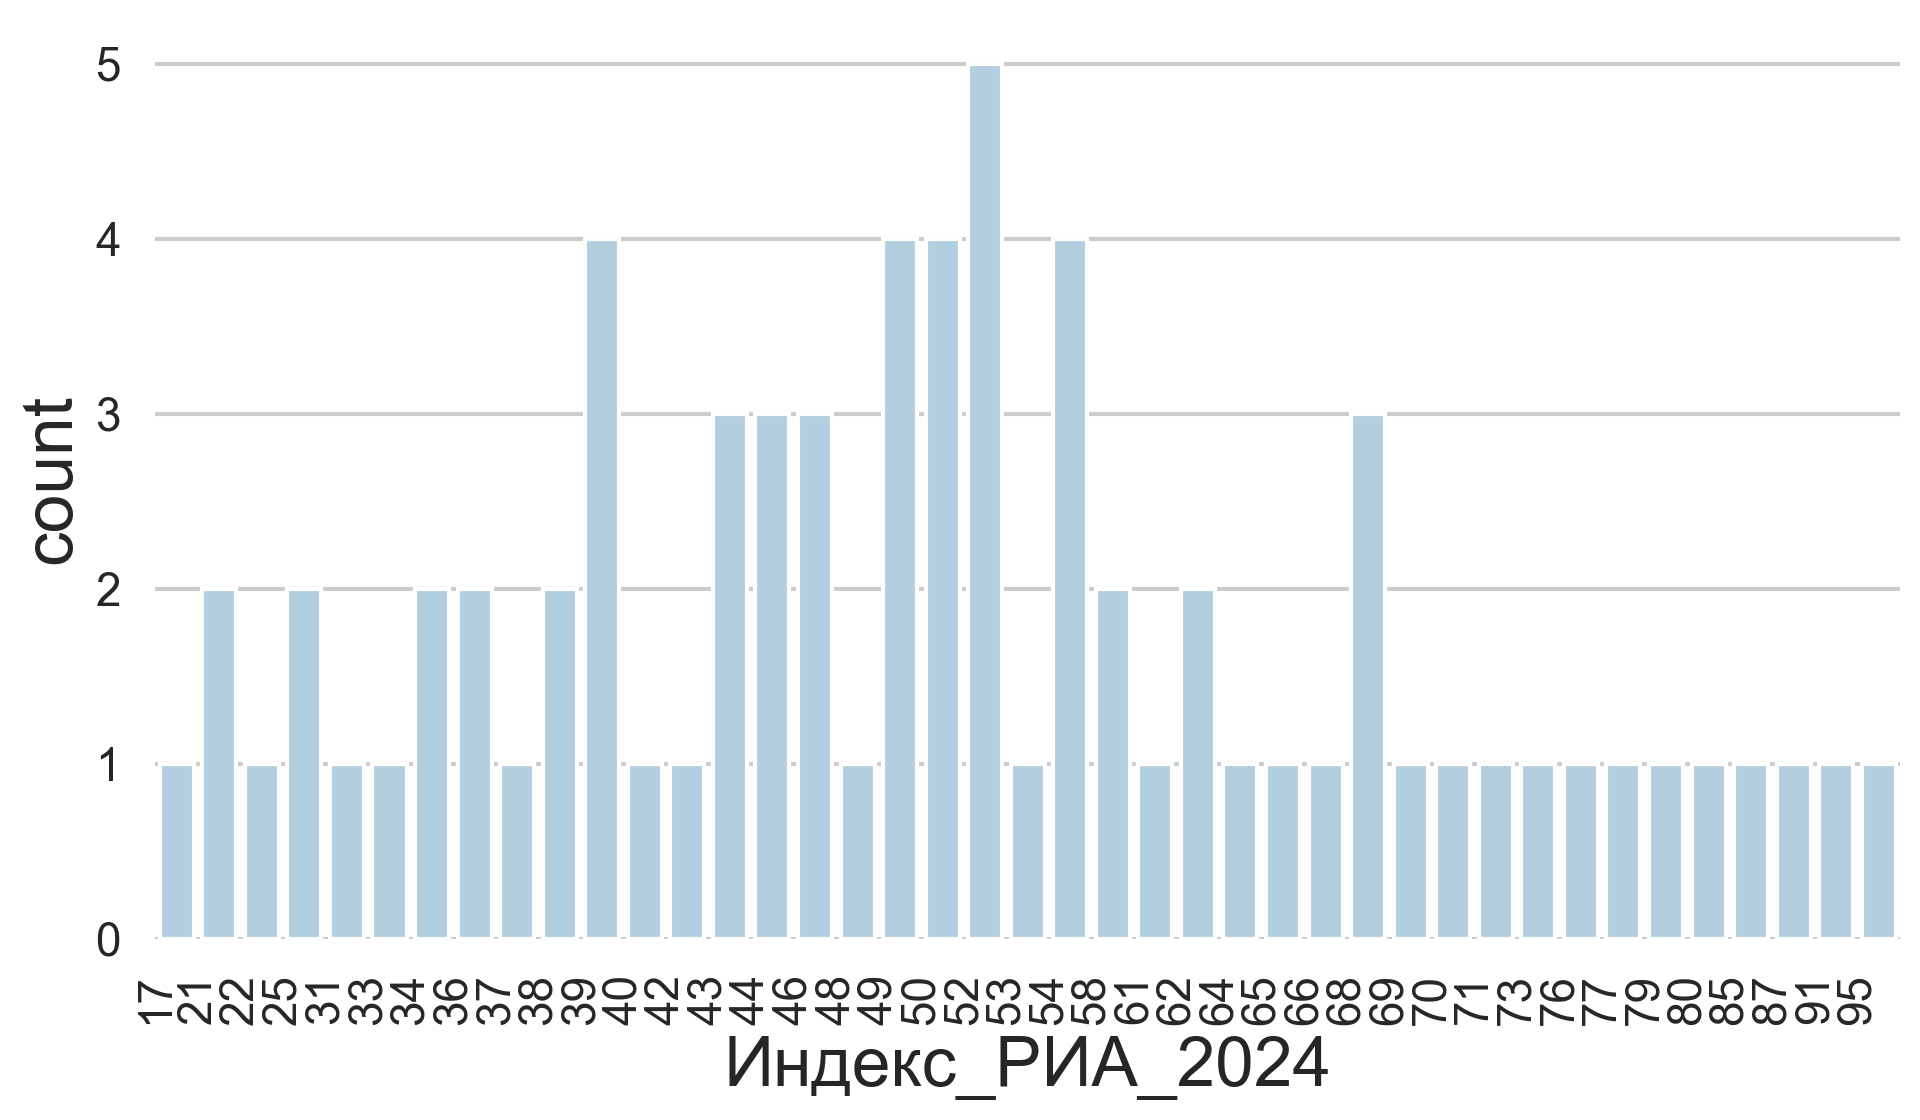

In [21]:
sns.countplot(data=dfi, x='Индекс_РИА_2024')
plt.xticks(rotation=90, ha='right')
plt.show()